<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [91]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [92]:
# amespath='../project-three/AmesHousingcsv.csv'
# ameshouse = pd.read_csv(amespath)
# # print sats.shape
# ameshouse.shape,ameshouse.describe

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [93]:
# load housing data

housepath='../project-three/housing.csv'
house = pd.read_csv(housepath)
# print sats.shape
house.shape,house.describe

house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [94]:
# removing non residentail properties from the dataset
residential = ['FV','RH','RL','RP','RM']

res=house[house['MSZoning'].isin(residential)]

res['NewSalespersqft'] =  res['SalePrice']/res['LotArea']
res['NLotArea'] =  np.log(res['LotArea'])
# res['MSZoning'].head(5)
# res['MSZoning']


resbef2010 = res[res.YearBuilt <=2010]

res2010 = res[res.YearBuilt == 2010]


C:\Users\bless\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bless\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [95]:
# res2010

# res2010['NewSalespersqft'] =  res2010['SalePrice']/res2010['LotArea']
# res2010['NLotArea'] =  np.log(res2010['LotArea'])
res2010['NLotArea'].head(10)

378    9.340842
Name: NLotArea, dtype: float64

In [96]:
# # compute sales price per sqft and log of lot area
# resbef2010['NewSalespersqft'] =  resbef2010['SalePrice']/resbef2010['LotArea']
# resbef2010['NLotArea'] =  np.log(resbef2010['LotArea'])
resbef2010['NLotArea'].head(10)

0    9.041922
1    9.169518
2    9.328123
3    9.164296
4    9.565214
5    9.554993
6    9.218705
7    9.247829
8    8.719317
9    8.911934
Name: NLotArea, dtype: float64

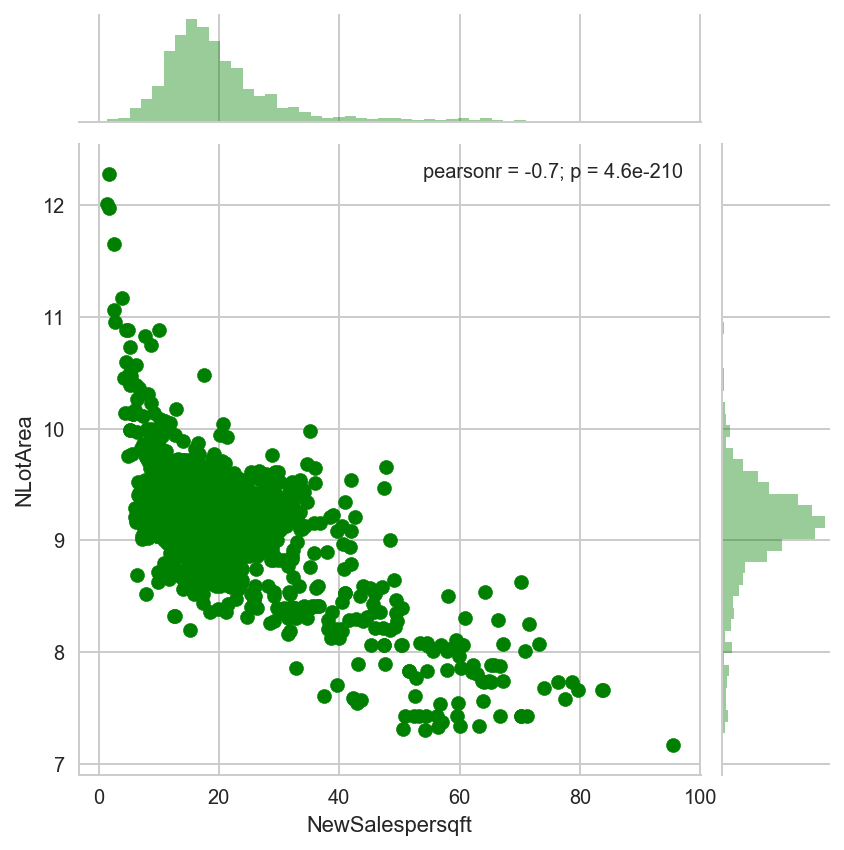

In [97]:
sns.jointplot(resbef2010['NewSalespersqft'], resbef2010['NLotArea'],color='g')

# Shows negative correlation between price and Lot area

Shows good correlation between price and Lot area

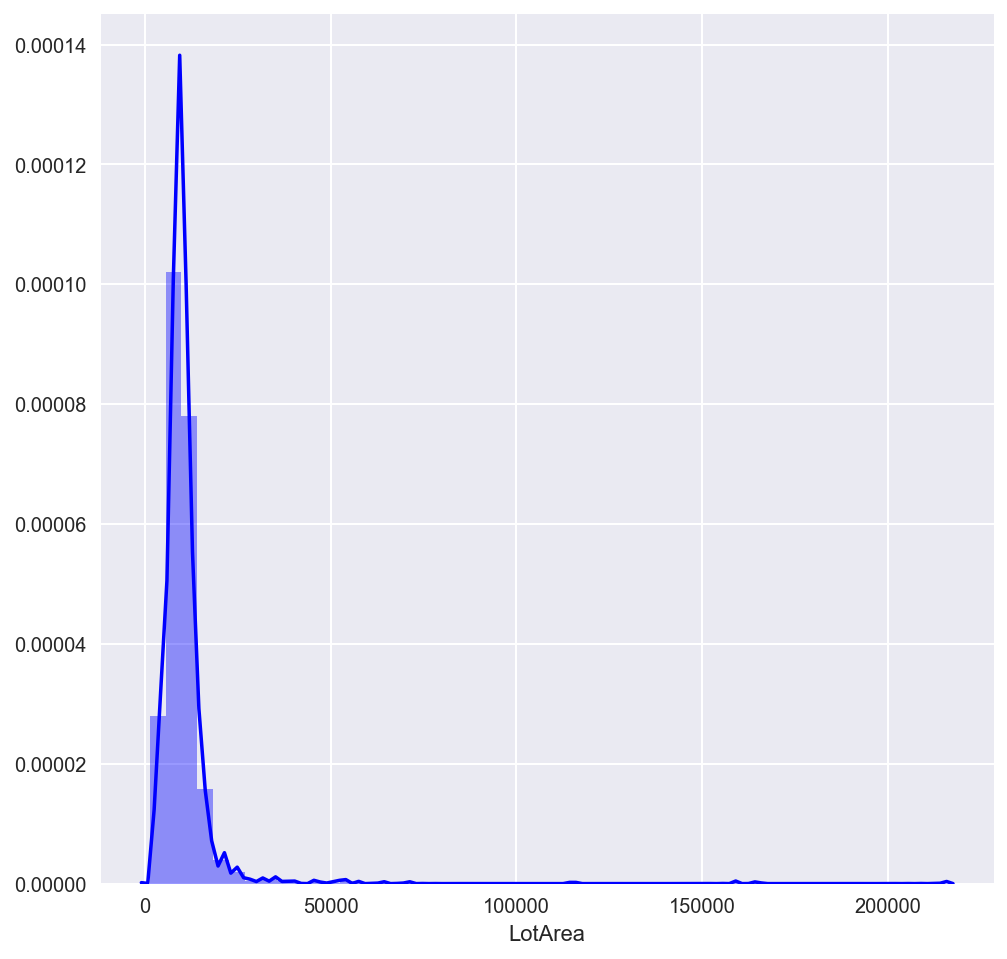

In [98]:
# set plot size
sns.set(rc={"figure.figsize": (8, 8)})
sns.distplot(resbef2010.LotArea, kde=True,color='b')


In [99]:
resbef2010.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

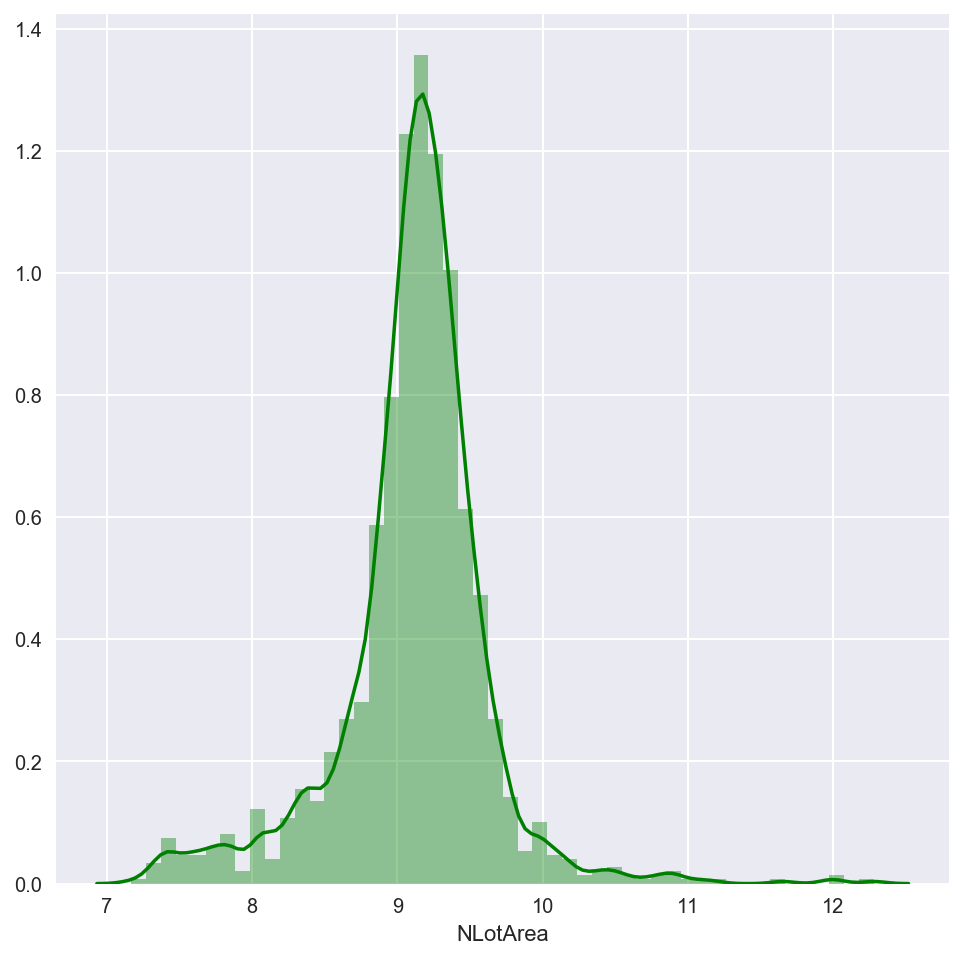

In [100]:
# set plot size
sns.set(rc={"figure.figsize": (8, 8)})
sns.distplot(resbef2010.NLotArea, kde=True,color='g')

In [101]:
resbef2010.dtypes


Id                   int64
MSSubClass           int64
MSZoning            object
LotFrontage        float64
LotArea              int64
Street              object
Alley               object
LotShape            object
LandContour         object
Utilities           object
LotConfig           object
LandSlope           object
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual          int64
OverallCond          int64
YearBuilt            int64
YearRemodAdd         int64
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrType          object
MasVnrArea         float64
ExterQual           object
ExterCond           object
Foundation          object
BsmtQual            object
BsmtCond            object
BsmtExposure        object
BsmtFinType1        object
BsmtFinSF1           int64
BsmtFinType2        object
BsmtFinSF2           int64
B

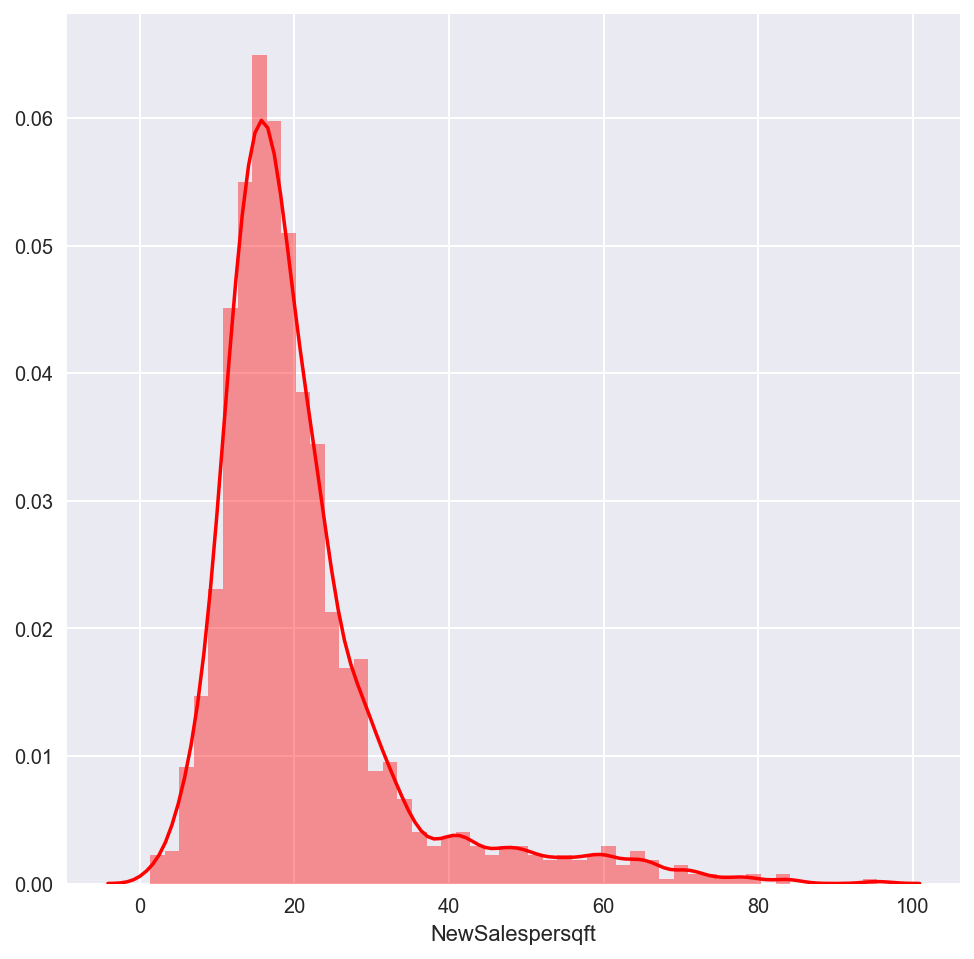

In [102]:
sns.set(rc={"figure.figsize": (8, 8)})
sns.distplot(resbef2010.NewSalespersqft, kde=True,color='r')

In [103]:
resbef2010.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NewSalespersqft,NLotArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,9.041922
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,9.169518
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667,9.328123
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686,9.164296
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557,9.565214
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,10.131066,9.554993
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,30.444268,9.218705
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,19.264111,9.247829
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,21.225490,8.7193

In [104]:
# Transforming string data variables to dummy variables for regression 


resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['MSZoning'],prefix='MSZonetype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['LotShape'],prefix='LotShapetype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['Utilities'],prefix='Utilitiestype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['SaleType'],prefix='SaleType_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['Heating'],prefix='Heatingtype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['CentralAir'],prefix='CentralAirtype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['Electrical'],prefix='Electricaltype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['Neighborhood'],prefix='Neighborhoodtype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['KitchenQual'],prefix='KitchenQualtype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['Functional'],prefix='Fucntionaltype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['FireplaceQu'],prefix='FireplaceQutype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['RoofMatl'],prefix='RoofMatltype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['GarageQual'],prefix='GarageQualtype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['HouseStyle'],prefix='HouseStyletype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['BldgType'],prefix='Bldgtype_')], axis=1)
resbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['Utilities'],prefix='Utiltype_')], axis=1)
# cabin_dummy = pd.get_dummies(cabin_letter, prefix='cabin')
# cabin_dummy.head()

# transform data using dummy variables 
# df = pd.concat([df, pd.get_dummies(df['type'],prefix='type_')], axis=1)
# df = pd.concat([df, pd.get_dummies(df['type'],prefix='type_')], axis=1)

In [105]:
res2010 = pd.concat([res2010, pd.get_dummies(res2010['MSZoning'],prefix='MSZonetype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['LotShape'],prefix='LotShapetype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['Utilities'],prefix='Utilitiestype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['SaleType'],prefix='SaleType_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['Heating'],prefix='Heatingtype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['CentralAir'],prefix='CentralAirtype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['Electrical'],prefix='Electricaltype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['Neighborhood'],prefix='Neighborhoodtype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['KitchenQual'],prefix='KitchenQualtype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['Functional'],prefix='Fucntionaltype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['FireplaceQu'],prefix='FireplaceQutype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['RoofMatl'],prefix='RoofMatltype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['GarageQual'],prefix='GarageQualtype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['HouseStyle'],prefix='HouseStyletype_')], axis=1)
res2010 = pd.concat([res2010, pd.get_dummies(res2010['BldgType'],prefix='Bldgtype_')], axis=1)

In [106]:
res2010.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [107]:
res2010.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NewSalespersqft,NLotArea,MSZonetype__RL,LotShapetype__Reg,Utilitiestype__AllPub,SaleType__New,Heatingtype__GasA,CentralAirtype__Y,Electricaltype__SBrkr,Neighborhoodtype__StoneBr,KitchenQualtype__Ex,Fucntionaltype__Typ,FireplaceQutype__Ex,RoofMatltype__CompShg,GarageQualtype__TA,HouseStyletype__1Story,Bldgtype__1Fam
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445,Unf,0,411,1856,GasA,Ex,Y,SBrkr,1856,0,0,1856,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3,834,TA,TA,Y,113,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432,34.617518,9.340842,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [108]:
resbef2010.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NewSalespersqft,NLotArea,MSZonetype__FV,MSZonetype__RH,MSZonetype__RL,MSZonetype__RM,LotShapetype__IR1,LotShapetype__IR2,LotShapetype__IR3,LotShapetype__Reg,Utilitiestype__AllPub,Utilitiestype__NoSeWa,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,Heatingtype__Floor,Heatingtype__GasA,Heatingtype__GasW,Heatingtype__Grav,Heatingtype__OthW,Heatingtype__Wall,CentralAirtype__N,CentralAirtype__Y,Electricaltype__FuseA,Electricaltype__FuseF,Electricaltype__FuseP,Electricaltype__Mix,Electricaltype__SBrkr,Neighborhoodtype__Blmngtn,Neighborhoodtype__Blueste,Neighborhoodtype__BrDale,Neighborhoodtype__BrkSide,Neighborhoodtype__ClearCr,Neighborhoodtype__CollgCr,Neighborhoodtype__Crawfor,Neighborhoodtype__Edwards,Neighborhoodtype__Gilbert,Neighborhoodtype__IDOTRR,Neighborhoodtype__MeadowV,Neighborhoodtype__Mitchel,Neighborhoodtype__NAmes,Neighborhoodtype__NPkVill,Neighborhoodtype__NWAmes,Neighborhoodtype__NoRidge,Neighborhoodtype__NridgHt,Neighborhoodtype__OldTown,Neighborhoodtype__SWISU,Neighborhoodtype__Sawyer,Neighborhoodtype__SawyerW,Neighborhoodtype__Somerst,Neighborhoodtype__StoneBr,Neighborhoodtype__Timber,Neighborhoodtype__Veenker,KitchenQualtype__Ex,KitchenQualtype__Fa,KitchenQualtype__Gd,KitchenQualtype__TA,Fucntionaltype__Maj1,Fucntionaltype__Maj2,Fucntionaltype__Min1,Fucntionaltype__Min2,Fucntionaltype__Mod,Fucntionaltype__Sev,Fucntionaltype__Typ,FireplaceQutype__Ex,FireplaceQutype__Fa,FireplaceQutype__Gd,FireplaceQutype__Po,FireplaceQutype__TA,RoofMatltype__ClyTile,RoofMatltype__CompShg,RoofMatltype__Membran,RoofMatltype__Metal,RoofMatltype__Roll,RoofMatltype__Tar&Grv,RoofMatltype__WdShake,RoofMatltype__WdShngl,GarageQualtype__Ex,GarageQualtype__Fa,GarageQualtype__Gd,GarageQualtype__Po,GarageQualtype__TA,HouseStyletype__1.5Fin,HouseStyletype__1.5Unf,HouseStyletype__1Story,HouseStyletype__2.5Fin,HouseStyletype__2.5Unf,HouseStyletype__2Story,HouseStyletype__SFoyer,HouseStyletype__SLvl,Bldgtype__1Fam,Bldgtype__2fmCon,Bldgtype__Duplex,Bldgtype__Twnhs,Bldgtype__TwnhsE,Utiltype__AllPub,Utiltype__NoSeWa
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,9.041922,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,9.169518,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,

In [109]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

y = resbef2010["NewSalespersqft"]
X = resbef2010[["NLotArea","MSSubClass"]]

X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NewSalespersqft   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     843.5
Date:                Thu, 05 Apr 2018   Prob (F-statistic):          1.50e-243
Time:                        15:44:57   Log-Likelihood:                -5144.9
No. Observations:                1450   AIC:                         1.030e+04
Df Residuals:                    1447   BIC:                         1.031e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.3490      4.554     31.040      0.000     132.416     150.282
NLotArea     -13.6749      0.481    -28.426      0.000     -14.619     -12.731
MSSubClass     0.0773      0.006     13.087      0.000       0.066       0.089
==============================================================================
Omnibus:                      250.287   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.886
Skew:                           0.995   Prob(JB):                    2.35e-115
Kurtosis:                       5.186   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
resbef2010.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NewSalespersqft,NLotArea,MSZonetype__FV,MSZonetype__RH,MSZonetype__RL,MSZonetype__RM,LotShapetype__IR1,LotShapetype__IR2,LotShapetype__IR3,LotShapetype__Reg,Utilitiestype__AllPub,Utilitiestype__NoSeWa,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,Heatingtype__Floor,Heatingtype__GasA,Heatingtype__GasW,Heatingtype__Grav,Heatingtype__OthW,Heatingtype__Wall,CentralAirtype__N,CentralAirtype__Y,Electricaltype__FuseA,Electricaltype__FuseF,Electricaltype__FuseP,Electricaltype__Mix,Electricaltype__SBrkr,Neighborhoodtype__Blmngtn,Neighborhoodtype__Blueste,Neighborhoodtype__BrDale,Neighborhoodtype__BrkSide,Neighborhoodtype__ClearCr,Neighborhoodtype__CollgCr,Neighborhoodtype__Crawfor,Neighborhoodtype__Edwards,Neighborhoodtype__Gilbert,Neighborhoodtype__IDOTRR,Neighborhoodtype__MeadowV,Neighborhoodtype__Mitchel,Neighborhoodtype__NAmes,Neighborhoodtype__NPkVill,Neighborhoodtype__NWAmes,Neighborhoodtype__NoRidge,Neighborhoodtype__NridgHt,Neighborhoodtype__OldTown,Neighborhoodtype__SWISU,Neighborhoodtype__Sawyer,Neighborhoodtype__SawyerW,Neighborhoodtype__Somerst,Neighborhoodtype__StoneBr,Neighborhoodtype__Timber,Neighborhoodtype__Veenker,KitchenQualtype__Ex,KitchenQualtype__Fa,KitchenQualtype__Gd,KitchenQualtype__TA,Fucntionaltype__Maj1,Fucntionaltype__Maj2,Fucntionaltype__Min1,Fucntionaltype__Min2,Fucntionaltype__Mod,Fucntionaltype__Sev,Fucntionaltype__Typ,FireplaceQutype__Ex,FireplaceQutype__Fa,FireplaceQutype__Gd,FireplaceQutype__Po,FireplaceQutype__TA,RoofMatltype__ClyTile,RoofMatltype__CompShg,RoofMatltype__Membran,RoofMatltype__Metal,RoofMatltype__Roll,RoofMatltype__Tar&Grv,RoofMatltype__WdShake,RoofMatltype__WdShngl,GarageQualtype__Ex,GarageQualtype__Fa,GarageQualtype__Gd,GarageQualtype__Po,GarageQualtype__TA,HouseStyletype__1.5Fin,HouseStyletype__1.5Unf,HouseStyletype__1Story,HouseStyletype__2.5Fin,HouseStyletype__2.5Unf,HouseStyletype__2Story,HouseStyletype__SFoyer,HouseStyletype__SLvl,Bldgtype__1Fam,Bldgtype__2fmCon,Bldgtype__Duplex,Bldgtype__Twnhs,Bldgtype__TwnhsE,Utiltype__AllPub,Utiltype__NoSeWa
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,9.041922,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,9.169518,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,

In [111]:
# R squared is 53% showing that the lotarea and zone sub class accounts are  significant factors affecting sales price

In [112]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

y = resbef2010["NewSalespersqft"]

Fixed = ['NLotArea','MSSubClass','TotalBsmtSF','GarageCars','YearBuilt','Bldgtype__1Fam', \
       'Bldgtype__2fmCon', 'Bldgtype__Duplex', 'Bldgtype__Twnhs','Bldgtype__TwnhsE', \
'Neighborhoodtype__Blmngtn','Neighborhoodtype__Blueste','Neighborhoodtype__BrDale','Neighborhoodtype__BrkSide', \
'Neighborhoodtype__ClearCr','Neighborhoodtype__CollgCr','Neighborhoodtype__Crawfor','Neighborhoodtype__Edwards', \
'Neighborhoodtype__Gilbert','Neighborhoodtype__IDOTRR','Neighborhoodtype__MeadowV','Neighborhoodtype__Mitchel', \
'Neighborhoodtype__NAmes','Neighborhoodtype__NPkVill','Neighborhoodtype__NWAmes','Neighborhoodtype__NoRidge', \
'Neighborhoodtype__NridgHt','Neighborhoodtype__OldTown','Neighborhoodtype__SWISU','Neighborhoodtype__Sawyer', \
'Neighborhoodtype__SawyerW','Neighborhoodtype__Somerst','Neighborhoodtype__StoneBr','Neighborhoodtype__Timber', \
'Neighborhoodtype__Veenker']

# X = resbef2010[["NLotArea","MSSubClass","TotalBsmtSF","GarageCars","YearBuilt","Bldgtype__1Fam", \
#        "Bldgtype__2fmCon", "Bldgtype__Duplex", "Bldgtype__Twnhs","Bldgtype__TwnhsE"]]

X=resbef2010[Fixed]

X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics

y_pred = model.predict(X)
model.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NewSalespersqft   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     292.1
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:44:58   Log-Likelihood:                -4215.2
No. Observations:                1450   AIC:                             8498.
Df Residuals:                    1416   BIC:                             8678.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        35.2421     15.040      2.343      0.019       5.740      64.744
NLotArea                    -13.7376      0.387    -35.479      0.000     -14.497     -12.978
MSSubClass                    0.0745      0.006     11.903      0.000       0.062       0.087
TotalBsmtSF                   0.0054      0.000     14.901      0.000       0.005       0.006
GarageCars                    2.0004      0.220      9.080      0.000       1.568       2.433
YearBuilt                     0.0458      0.009      5.075      0.000       0.028       0.064
Bldgtype__1Fam                8.1889      3.034      2.699      0.007       2.238      14.140
Bldgtype__2fmCon             -1.5694      3.137     -0.500      0.617      -7.723       4.584
Bldgtype__Duplex              2.4571      3.098      0.793      0.428      -3.619       8.533
Bldgtype__Twnhs              18.1331      3.096      5.858      0.000      12.060      24.206
Bldgtype__TwnhsE              8.0325      3.062      2.623      0.009       2.025      14.040
Neighborhoodtype__Blmngtn    13.7047      1.372      9.991      0.000      11.014      16.395
Neighborhoodtype__Blueste    29.2347      3.140      9.311      0.000      23.076      35.394
Neighborhoodtype__BrDale      2.6856      1.356      1.980      0.048       0.025       5.346
Neighborhoodtype__BrkSide    -2.6397      0.692     -3.813      0.000      -3.998      -1.282
Neighborhoodtype__ClearCr     2.3252      1.118      2.080      0.038       0.132       4.518
Neighborhoodtype__CollgCr    -1.5578      0.928     -1.678      0.093      -3.378       0.263
Neighborhoodtype__Crawfor     3.3797      0.759      4.455      0.000       1.892       4.868
Neighborhoodtype__Edwards    -3.3357      0.724     -4.609      0.000      -4.756      -1.916
Neighborhoodtype__Gilbert    -2.0077      1.037     -1.936      0.053      -4.042       0.026
Neighborhoodtype__IDOTRR     -3.8451      0.913     -4.209      0.000      -5.637      -2.053
Neighborhoodtype__MeadowV    -4.4017      1.280     -3.439      0.001      -6.912      -1.891
Neighborhoodtype__Mitchel    -3.4979      0.971     -3.602      0.000      -5.403      -1.593
Neighborhoodtype__NAmes      -2.9823      0.656     -4.545      0.000      -4.269      -1.695
Neighborhoodtype__NPkVill     3.0611      1.592      1.922      0.055      -0.063       6.185
Neighborhoodtype__NWAmes     -2.3670      0.867     -2.729      0.006      -4.068      -0.666
Neighborhoodtype__NoRidge     3.7377      1.089      3.431      0.001       1.601       5.874
Neighborhoodtype__NridgHt     3.2032      1.016      3.153      0.002       1.210       5.196
Neighborhoodtype__OldTown    -2.5232      0.531     -4.753      0.000      -3.565      -1.482
Neighborhoodtype__SWISU      -0.7228      0.951     -0.760      0.447      

#R squared is 87% showing that fixed features such as  LotArea,MSSubClass,TotalBsmtSF,"GarageCars,YearBuilt,Bldgtypes 2fmcon, Twnhs,TwnhsE 
#are  significant factors affecting sales price> the coefficients determines the contribution of each factor to the unit sales price per sqft 

Main +ve contributors based on the coefficients are :
    Bldgtype__1Fam,
    Bldgtype__Twnhs	,
    Neighborhoodtype__Blmngtn,
    Neighborhoodtype__Blueste

But larger units contribute negatively to unit price per sqft :
    NLotArea


In [114]:
model.params

const                        35.242148
NLotArea                    -13.737556
MSSubClass                    0.074518
TotalBsmtSF                   0.005397
GarageCars                    2.000384
YearBuilt                     0.045841
Bldgtype__1Fam                8.188915
Bldgtype__2fmCon             -1.569432
Bldgtype__Duplex              2.457099
Bldgtype__Twnhs              18.133109
Bldgtype__TwnhsE              8.032457
Neighborhoodtype__Blmngtn    13.704680
Neighborhoodtype__Blueste    29.234731
Neighborhoodtype__BrDale      2.685644
Neighborhoodtype__BrkSide    -2.639720
Neighborhoodtype__ClearCr     2.325201
Neighborhoodtype__CollgCr    -1.557801
Neighborhoodtype__Crawfor     3.379672
Neighborhoodtype__Edwards    -3.335724
Neighborhoodtype__Gilbert    -2.007709
Neighborhoodtype__IDOTRR     -3.845110
Neighborhoodtype__MeadowV    -4.401680
Neighborhoodtype__Mitchel    -3.497875
Neighborhoodtype__NAmes      -2.982313
Neighborhoodtype__NPkVill     3.061140
Neighborhoodtype__NWAmes 

Using the model.params we can essentually put together the linear equation our model as follows:

Y(hat) = 14.97 -14.15Nlotarea + 0.086MSSUbclass +0.0068TotalBsmtSF + 3.1423GarageCars+ 0.057YearBuilt+3.84Bldgtype1Fam -7.10Bldgtype2fmCon-3.785088BldgtypeDuplex+15.733BldgtypeTwnhs+6.289Bldgtype__TwnhsE +6.280500Neighborhoodtype__StoneBr

In [115]:
# resbef2010.columns

In [116]:
resbef2010['y_pred'] = y_pred
resbef2010['Residuals'] = resbef2010['NewSalespersqft'] - resbef2010['y_pred']

In [117]:
resbef2010['Residuals'] 

0        2.103260
1       -0.003528
2        0.973362
3       -9.339782
4       -6.569055
5       -1.924396
6        3.016085
7        0.351267
8       -1.284513
9       -3.095475
10       0.548412
11       2.518263
12       2.932028
13       4.248842
14       1.562925
15       0.287016
16      -0.276276
17       0.851432
18      -1.615352
19       1.820835
20      -1.024655
21       4.344316
22       1.048390
23      -2.569920
24       3.209930
25      -5.196108
26       0.503266
27      -0.244910
28       4.310679
29      -5.105728
31       1.687008
32      -1.847914
33      -0.338162
34       0.417399
35      -1.405716
36      -3.679921
37      -0.234721
38      -2.085624
39       2.487431
40       1.137902
41      -1.223555
42      -5.436472
43      -1.423369
44       1.165099
45       3.847035
46       1.416378
47      -5.540950
48       3.486569
49       0.730196
50      -1.942637
51      -3.180942
52      -1.718513
53       6.133697
54      -1.992503
55       0.842446
56       3

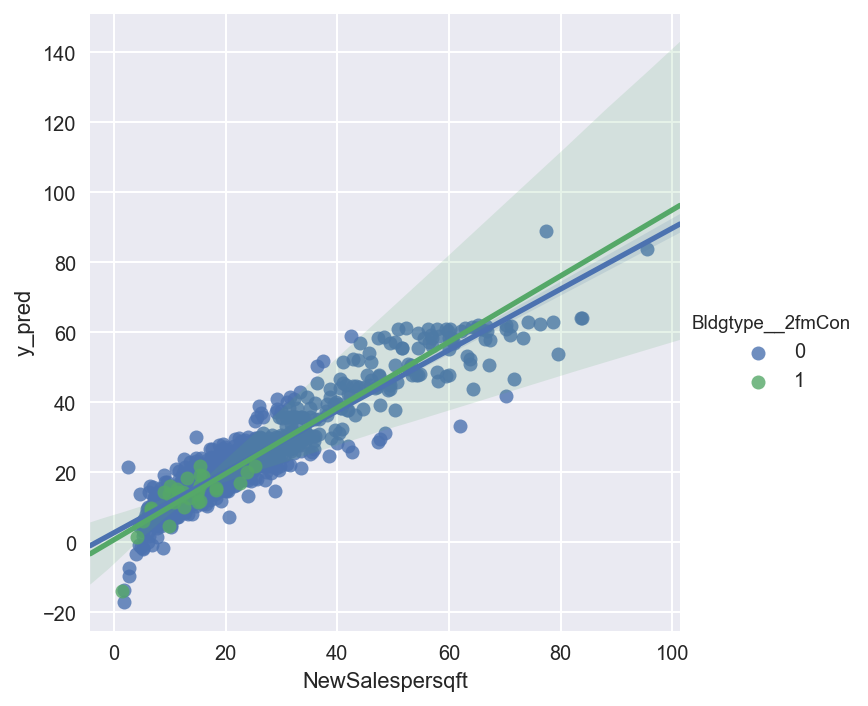

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='NewSalespersqft', y='y_pred', data=resbef2010,hue='Bldgtype__2fmCon')


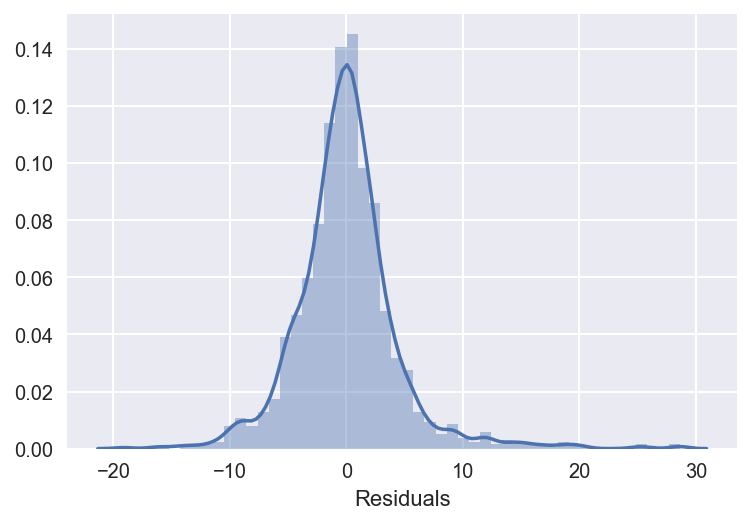

In [119]:
# Normality:  Do the Residual Errors follow a normal distribution?

# I believe all those properties with 0 values are causing the Y intercept to be higher up
# resulting in a less steep slope, thus creating areas where residual error is higher.
sns.distplot(resbef2010['Residuals'])

the distributuon plot of the residuals shows normality trend 

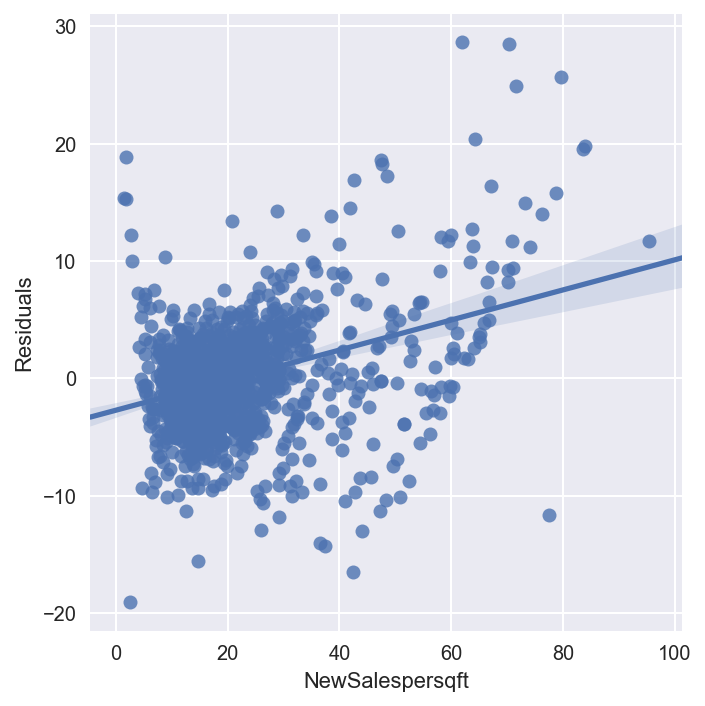

In [120]:
# checking for Equality of variance.  

sns.lmplot(x='NewSalespersqft', y='Residuals', data=resbef2010)

In [121]:
resbef2010['Residuals'].mean()

9.407419211442927e-12

In [122]:
# as the residuals mean is very small, this means that the On average, our predictions are off with very small variance which could be  signification or insignification depending on the value of the home.

In [123]:
resbef2010.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,NewSalespersqft,NLotArea,MSZonetype__FV,MSZonetype__RH,MSZonetype__RL,MSZonetype__RM,LotShapetype__IR1,LotShapetype__IR2,LotShapetype__IR3,LotShapetype__Reg,Utilitiestype__AllPub,Utilitiestype__NoSeWa,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,Heatingtype__Floor,Heatingtype__GasA,Heatingtype__GasW,Heatingtype__Grav,Heatingtype__OthW,Heatingtype__Wall,CentralAirtype__N,CentralAirtype__Y,Electricaltype__FuseA,Electricaltype__FuseF,Electricaltype__FuseP,Electricaltype__Mix,Electricaltype__SBrkr,Neighborhoodtype__Blmngtn,Neighborhoodtype__Blueste,Neighborhoodtype__BrDale,Neighborhoodtype__BrkSide,Neighborhoodtype__ClearCr,Neighborhoodtype__CollgCr,Neighborhoodtype__Crawfor,Neighborhoodtype__Edwards,Neighborhoodtype__Gilbert,Neighborhoodtype__IDOTRR,Neighborhoodtype__MeadowV,Neighborhoodtype__Mitchel,Neighborhoodtype__NAmes,Neighborhoodtype__NPkVill,Neighborhoodtype__NWAmes,Neighborhoodtype__NoRidge,Neighborhoodtype__NridgHt,Neighborhoodtype__OldTown,Neighborhoodtype__SWISU,Neighborhoodtype__Sawyer,Neighborhoodtype__SawyerW,Neighborhoodtype__Somerst,Neighborhoodtype__StoneBr,Neighborhoodtype__Timber,Neighborhoodtype__Veenker,KitchenQualtype__Ex,KitchenQualtype__Fa,KitchenQualtype__Gd,KitchenQualtype__TA,Fucntionaltype__Maj1,Fucntionaltype__Maj2,Fucntionaltype__Min1,Fucntionaltype__Min2,Fucntionaltype__Mod,Fucntionaltype__Sev,Fucntionaltype__Typ,FireplaceQutype__Ex,FireplaceQutype__Fa,FireplaceQutype__Gd,FireplaceQutype__Po,FireplaceQutype__TA,RoofMatltype__ClyTile,RoofMatltype__CompShg,RoofMatltype__Membran,RoofMatltype__Metal,RoofMatltype__Roll,RoofMatltype__Tar&Grv,RoofMatltype__WdShake,RoofMatltype__WdShngl,GarageQualtype__Ex,GarageQualtype__Fa,GarageQualtype__Gd,GarageQualtype__Po,GarageQualtype__TA,HouseStyletype__1.5Fin,HouseStyletype__1.5Unf,HouseStyletype__1Story,HouseStyletype__2.5Fin,HouseStyletype__2.5Unf,HouseStyletype__2Story,HouseStyletype__SFoyer,HouseStyletype__SLvl,Bldgtype__1Fam,Bldgtype__2fmCon,Bldgtype__Duplex,Bldgtype__Twnhs,Bldgtype__TwnhsE,Utiltype__AllPub,Utiltype__NoSeWa,y_pred,Residuals
count,1450.000000,1450.000000,1191.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1442.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1371.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.

In [124]:
# print  resbef2010['NLotArea']

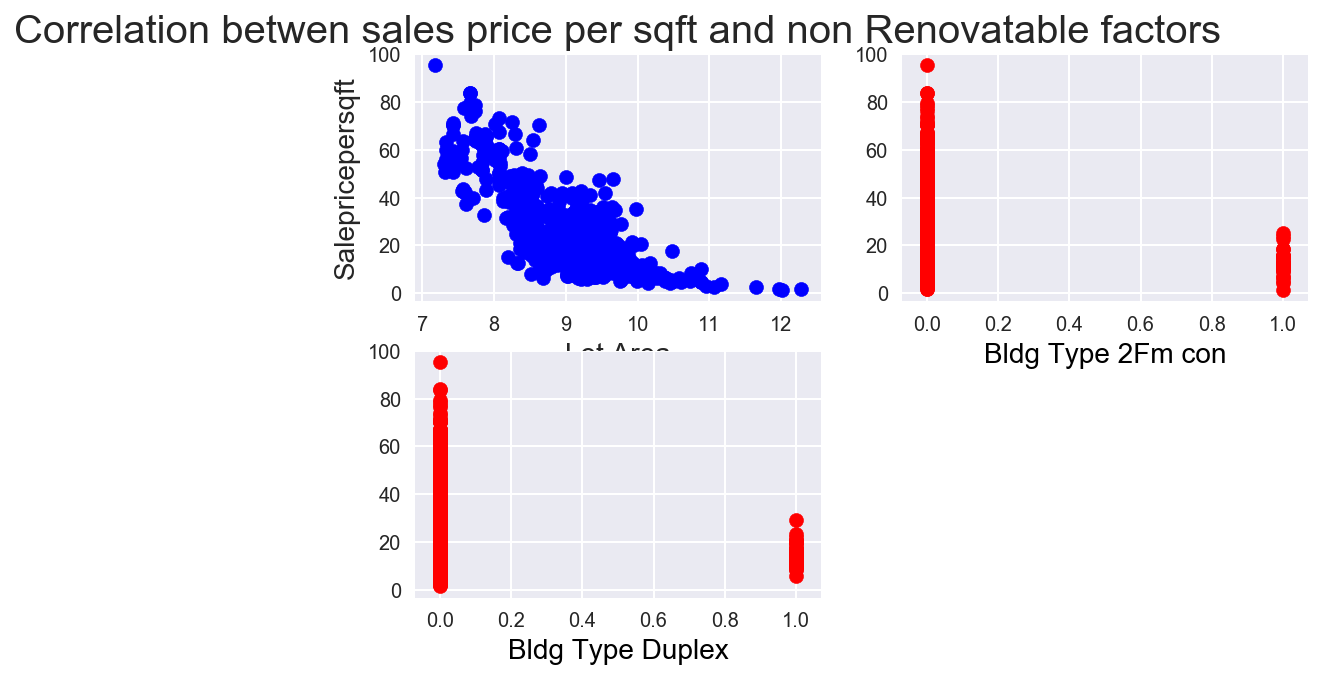

In [125]:
# Plot scatter plots
fig = plt.figure(figsize=(8,5))


plt.subplot(221)
ax = fig.gca()


ax.set_xlabel('Lot Area', fontsize=14)
ax.set_ylabel('Salepricepersqft', fontsize=14)
ax.set_title('Correlation betwen sales price per sqft and non Renovatable factors', fontsize=20)
plt.scatter(x = resbef2010['NLotArea'] ,y=resbef2010['NewSalespersqft'],c='b')


plt.subplot(222)
plt.legend(loc='upper left')
plt.xlabel('Lot Area', fontsize=14, color='black')
# actual known points

plt.scatter(x = resbef2010['Bldgtype__2fmCon'] ,y=resbef2010['NewSalespersqft'],c='r')
plt.xlabel('Bldg Type 2Fm con', fontsize=14, color='black')

plt.subplot(223)
plt.legend(loc='upper left')
# actual known points

plt.scatter(x = resbef2010['Bldgtype__Duplex'] ,y=resbef2010['NewSalespersqft'],c='r')
plt.xlabel('Bldg Type Duplex', fontsize=14, color='black')

plt.show()

Using the model to predict house price for 2010


Y(hat) = 14.97 -14.15Nlotarea + 0.086MSSUbclass + 
0.0068TotalBsmtSF + 3.1423GarageCars+ 0.057YearBuilt+3.84Bldgtype1Fam -7.10Bldgtype2fmCon-3.785088BldgtypeDuplex+15.733BldgtypeTwnhs+6.289Bldgtype__TwnhsE

In [126]:
res2010.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NewSalespersqft,NLotArea,MSZonetype__RL,LotShapetype__Reg,Utilitiestype__AllPub,SaleType__New,Heatingtype__GasA,CentralAirtype__Y,Electricaltype__SBrkr,Neighborhoodtype__StoneBr,KitchenQualtype__Ex,Fucntionaltype__Typ,FireplaceQutype__Ex,RoofMatltype__CompShg,GarageQualtype__TA,HouseStyletype__1Story,Bldgtype__1Fam
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445,Unf,0,411,1856,GasA,Ex,Y,SBrkr,1856,0,0,1856,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3,834,TA,TA,Y,113,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432,34.617518,9.340842,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [127]:
res2010.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [128]:
res2010['Bldgtype__1Fam'] ,res2010['Neighborhoodtype__StoneBr'] 

(378    1
 Name: Bldgtype__1Fam, dtype: uint8, 378    1
 Name: Neighborhoodtype__StoneBr, dtype: uint8)

In [129]:
# res2010['Predictsalespricepersqftnew']=14.97 -14.15*res2010['NLotArea'] + 0.086*res2010['MSSubClass'] + \
# 0.0068*res2010['TotalBsmtSF'] + 3.1423*res2010['GarageCars']+ 0.057*res2010['YearBuilt']+3.84*res2010['Bldgtype__1Fam'] \
# + 6.280500*res2010['Neighborhoodtype__StoneBr'] 
# -7.10*res2010['Bldgtype__2fmCon'] -3.785088*res2010['Bldgtype__Duplex']  +15.733*res2010['Bldgtype__Twnhs']+ \
# 6.289*res2010['Bldgtype__TwnhsE']

res2010['Predictsalespricepersqftnew']=14.97 -14.15*res2010['NLotArea']  + 0.086*res2010['MSSubClass']  + \
0.0068*res2010['TotalBsmtSF']  + 3.1423*res2010['GarageCars']  + 0.057*res2010['YearBuilt']  +3.84*res2010['Bldgtype__1Fam'] \
 + 6.280500*res2010['Neighborhoodtype__StoneBr'] 
# -7.10*res2010['Bldgtype__2fmCon'] -3.785088*res2010['Bldgtype__Duplex']  +15.733*res2010['Bldgtype__Twnhs']+ \
# 6.289*res2010['Bldgtype__TwnhsE']


In [130]:
Residual2010=res2010['NewSalespersqft']-res2010['Predictsalespricepersqftnew']

In [131]:
print '2010 Actual sales price per sqft = ' ,res2010['NewSalespersqft'], \
'vs predicted sales price per sqft=', res2010['Predictsalespricepersqftnew'] \
, 'Difference is =', Residual2010,'or ', Residual2010*100/res2010['NewSalespersqft'],'%'

2010 Actual sales price per sqft =  378    34.617518
Name: NewSalespersqft, dtype: float64 vs predicted sales price per sqft= 378    31.255283
Name: Predictsalespricepersqftnew, dtype: float64 Difference is = 378    3.362235
dtype: float64 or  378    9.712524
dtype: float64 %


Differences between predicted and actual for 2010 prices is $3.36 per sq ft

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [132]:
resbef2010.head (3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NewSalespersqft,NLotArea,MSZonetype__FV,MSZonetype__RH,MSZonetype__RL,MSZonetype__RM,LotShapetype__IR1,LotShapetype__IR2,LotShapetype__IR3,LotShapetype__Reg,Utilitiestype__AllPub,Utilitiestype__NoSeWa,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,Heatingtype__Floor,Heatingtype__GasA,Heatingtype__GasW,Heatingtype__Grav,Heatingtype__OthW,Heatingtype__Wall,CentralAirtype__N,CentralAirtype__Y,Electricaltype__FuseA,Electricaltype__FuseF,Electricaltype__FuseP,Electricaltype__Mix,Electricaltype__SBrkr,Neighborhoodtype__Blmngtn,Neighborhoodtype__Blueste,Neighborhoodtype__BrDale,Neighborhoodtype__BrkSide,Neighborhoodtype__ClearCr,Neighborhoodtype__CollgCr,Neighborhoodtype__Crawfor,Neighborhoodtype__Edwards,Neighborhoodtype__Gilbert,Neighborhoodtype__IDOTRR,Neighborhoodtype__MeadowV,Neighborhoodtype__Mitchel,Neighborhoodtype__NAmes,Neighborhoodtype__NPkVill,Neighborhoodtype__NWAmes,Neighborhoodtype__NoRidge,Neighborhoodtype__NridgHt,Neighborhoodtype__OldTown,Neighborhoodtype__SWISU,Neighborhoodtype__Sawyer,Neighborhoodtype__SawyerW,Neighborhoodtype__Somerst,Neighborhoodtype__StoneBr,Neighborhoodtype__Timber,Neighborhoodtype__Veenker,KitchenQualtype__Ex,KitchenQualtype__Fa,KitchenQualtype__Gd,KitchenQualtype__TA,Fucntionaltype__Maj1,Fucntionaltype__Maj2,Fucntionaltype__Min1,Fucntionaltype__Min2,Fucntionaltype__Mod,Fucntionaltype__Sev,Fucntionaltype__Typ,FireplaceQutype__Ex,FireplaceQutype__Fa,FireplaceQutype__Gd,FireplaceQutype__Po,FireplaceQutype__TA,RoofMatltype__ClyTile,RoofMatltype__CompShg,RoofMatltype__Membran,RoofMatltype__Metal,RoofMatltype__Roll,RoofMatltype__Tar&Grv,RoofMatltype__WdShake,RoofMatltype__WdShngl,GarageQualtype__Ex,GarageQualtype__Fa,GarageQualtype__Gd,GarageQualtype__Po,GarageQualtype__TA,HouseStyletype__1.5Fin,HouseStyletype__1.5Unf,HouseStyletype__1Story,HouseStyletype__2.5Fin,HouseStyletype__2.5Unf,HouseStyletype__2Story,HouseStyletype__SFoyer,HouseStyletype__SLvl,Bldgtype__1Fam,Bldgtype__2fmCon,Bldgtype__Duplex,Bldgtype__Twnhs,Bldgtype__TwnhsE,Utiltype__AllPub,Utiltype__NoSeWa,y_pred,Residuals
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,9.041922,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,22.571296,2.103260
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,9.169518,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [133]:
# Now try and use other renovatable  features 

import statsmodels.api as sm
import numpy as np
import pandas as pd


y = resbef2010["NewSalespersqft"]

Renov=['RoofMatltype__ClyTile','RoofMatltype__CompShg','RoofMatltype__Membran', \
                'RoofMatltype__Metal','RoofMatltype__Roll','RoofMatltype__Tar&Grv','RoofMatltype__WdShake',\
                'RoofMatltype__WdShngl', 'Electricaltype__FuseA','Electricaltype__FuseF','Electricaltype__FuseP',\
                'Electricaltype__Mix','Electricaltype__SBrkr','Heatingtype__Floor', \
                'Heatingtype__GasA','Heatingtype__GasW','Heatingtype__Grav','Heatingtype__OthW', \
                'Heatingtype__Wall','Utiltype__AllPub','Utiltype__NoSeWa']
# Renov

# X = resbef2010[['RoofMatltype__ClyTile','RoofMatltype__CompShg','RoofMatltype__Membran', \
#                 'RoofMatltype__Metal','RoofMatltype__Roll','RoofMatltype__Tar&Grv','RoofMatltype__WdShake',\
#                 'RoofMatltype__WdShngl', 'Electricaltype__FuseA','Electricaltype__FuseF','Electricaltype__FuseP',\
#                 'Electricaltype__Mix','Electricaltype__SBrkr','Heatingtype__Floor', \
#                 'Heatingtype__GasA','Heatingtype__GasW','Heatingtype__Grav','Heatingtype__OthW', \
#                 'Heatingtype__Wall','Utiltype__AllPub','Utiltype__NoSeWa']]

X=resbef2010[Renov]
# # X = resbef2010[[resbef2010[Renov]]
                 

X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics

y_pred = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NewSalespersqft   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     3.638
Date:                Thu, 05 Apr 2018   Prob (F-statistic):           3.94e-07
Time:                        15:45:04   Log-Likelihood:                -5672.8
No. Observations:                1450   AIC:                         1.138e+04
Df Residuals:                    1431   BIC:                         1.148e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.482e+13   4.17e+13     -0.355      0.722   -9.66e+13    6.69e+13
RoofMatltype__ClyTile -2.137e+12   6.01e+12     -0.355      0.722   -1.39e+13    9.65e+12
RoofMatltype__CompShg -2.137e+12   6.01e+12     -0.355      0.722   -1.39e+13    9.65e+12
RoofMatltype__Membran -2.137e+12   6.01e+12     -0.355      0.722   -1.39e+13    9.65e+12
RoofMatltype__Metal   -2.137e+12   6.01e+12     -0.355      0.722   -1.39e+13    9.65e+12
RoofMatltype__Roll    -2.137e+12   6.01e+12     -0.355      0.722   -1.39e+13    9.65e+12
RoofMatltype__Tar&Grv -2.137e+12   6.01e+12     -0.355      0.722   -1.39e+13    9.65e+12
RoofMatltype__WdShake -2.137e+12   6.01e+12     -0.355      0.722   -1.39e+13    9.65e+12
RoofMatltype__WdShngl -2.137e+12   6.01e+12     -0.355      0.722   -1.39e+13    9.65e+12
Electricaltype__FuseA    -2.0598     12.253     -0.168      0.867     -26.095      21.976
Electricaltype__FuseF    -2.2420     12.424     -0.180      0.857     -26.613      22.129
Electricaltype__FuseP    -3.1254     14.068     -0.222      0.824     -30.722      24.472
Electricaltype__Mix      -9.6962     17.228     -0.563      0.574     -43.490      24.098
Electricaltype__SBrkr     4.8616     12.187      0.399      0.690     -19.045      28.768
Heatingtype__Floor    -2.536e+12   7.14e+12     -0.355      0.722   -1.65e+13    1.15e+13
Heatingtype__GasA     -2.536e+12   7.14e+12     -0.355      0.722   -1.65e+13    1.15e+13
Heatingtype__GasW     -2.536e+12   7.14e+12     -0.355      0.722   -1.65e+13    1.15e+13
Heatingtype__Grav     -2.536e+12   7.14e+12     -0.355      0.722   -1.65e+13    1.15e+13
Heatingtype__OthW     -2.536e+12   7.14e+12     -0.355      0.722   -1.65e+13    1.15e+13
Heatingtype__Wall     -2.536e+12   7.14e+12     -0.355      0.722   -1.65e+13    1.15e+13
Utiltype__AllPub       1.949e+13   5.48e+13      0.355      0.722   -8.81e+13    1.27e+14
Utiltype__NoSeWa       1.949e+13   5.48e+13      0.355      0.722   -8.81e+13    1.27e+14
==============================================================================
Omnibus:                      661.301   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3206.520
Skew:                           2.159   Prob(JB):                         0.00
Kurtosis:                       8.867   Cond. No.                     3.02e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.63e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Results shows Renovatable features did not contribute signficantly to the R squared (0.044) and hence does not seem to affect prices 

In [134]:
resbef2010.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NewSalespersqft,NLotArea,MSZonetype__FV,MSZonetype__RH,MSZonetype__RL,MSZonetype__RM,LotShapetype__IR1,LotShapetype__IR2,LotShapetype__IR3,LotShapetype__Reg,Utilitiestype__AllPub,Utilitiestype__NoSeWa,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,Heatingtype__Floor,Heatingtype__GasA,Heatingtype__GasW,Heatingtype__Grav,Heatingtype__OthW,Heatingtype__Wall,CentralAirtype__N,CentralAirtype__Y,Electricaltype__FuseA,Electricaltype__FuseF,Electricaltype__FuseP,Electricaltype__Mix,Electricaltype__SBrkr,Neighborhoodtype__Blmngtn,Neighborhoodtype__Blueste,Neighborhoodtype__BrDale,Neighborhoodtype__BrkSide,Neighborhoodtype__ClearCr,Neighborhoodtype__CollgCr,Neighborhoodtype__Crawfor,Neighborhoodtype__Edwards,Neighborhoodtype__Gilbert,Neighborhoodtype__IDOTRR,Neighborhoodtype__MeadowV,Neighborhoodtype__Mitchel,Neighborhoodtype__NAmes,Neighborhoodtype__NPkVill,Neighborhoodtype__NWAmes,Neighborhoodtype__NoRidge,Neighborhoodtype__NridgHt,Neighborhoodtype__OldTown,Neighborhoodtype__SWISU,Neighborhoodtype__Sawyer,Neighborhoodtype__SawyerW,Neighborhoodtype__Somerst,Neighborhoodtype__StoneBr,Neighborhoodtype__Timber,Neighborhoodtype__Veenker,KitchenQualtype__Ex,KitchenQualtype__Fa,KitchenQualtype__Gd,KitchenQualtype__TA,Fucntionaltype__Maj1,Fucntionaltype__Maj2,Fucntionaltype__Min1,Fucntionaltype__Min2,Fucntionaltype__Mod,Fucntionaltype__Sev,Fucntionaltype__Typ,FireplaceQutype__Ex,FireplaceQutype__Fa,FireplaceQutype__Gd,FireplaceQutype__Po,FireplaceQutype__TA,RoofMatltype__ClyTile,RoofMatltype__CompShg,RoofMatltype__Membran,RoofMatltype__Metal,RoofMatltype__Roll,RoofMatltype__Tar&Grv,RoofMatltype__WdShake,RoofMatltype__WdShngl,GarageQualtype__Ex,GarageQualtype__Fa,GarageQualtype__Gd,GarageQualtype__Po,GarageQualtype__TA,HouseStyletype__1.5Fin,HouseStyletype__1.5Unf,HouseStyletype__1Story,HouseStyletype__2.5Fin,HouseStyletype__2.5Unf,HouseStyletype__2Story,HouseStyletype__SFoyer,HouseStyletype__SLvl,Bldgtype__1Fam,Bldgtype__2fmCon,Bldgtype__Duplex,Bldgtype__Twnhs,Bldgtype__TwnhsE,Utiltype__AllPub,Utiltype__NoSeWa,y_pred,Residuals
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,9.041922,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,22.571296,2.103260
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,9.169518,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [135]:
# Now try and use other  quality features 

import statsmodels.api as sm
import numpy as np
import pandas as pd


y = resbef2010["NewSalespersqft"]


Quality = ['OverallQual','OverallCond', 'GarageQualtype__Ex','GarageQualtype__Fa','GarageQualtype__Gd','GarageQualtype__Po', \
           'GarageQualtype__TA'] # Some quality features 


X=resbef2010[Quality]

  
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics

y_pred = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NewSalespersqft   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     34.06
Date:                Thu, 05 Apr 2018   Prob (F-statistic):           4.00e-44
Time:                        15:45:05   Log-Likelihood:                -5594.3
No. Observations:                1450   AIC:                         1.120e+04
Df Residuals:                    1442   BIC:                         1.125e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1818      2.363      1.770      0.077      -0.454       8.817
OverallQual            3.3055      0.232     14.250      0.000       2.850       3.760
OverallCond           -0.4233      0.277     -1.530      0.126      -0.966       0.119
GarageQualtype__Ex    -6.9659      6.799     -1.025      0.306     -20.303       6.371
GarageQualtype__Fa    -3.0236      2.110     -1.433      0.152      -7.162       1.115
GarageQualtype__Gd    -2.3406      3.386     -0.691      0.489      -8.982       4.301
GarageQualtype__Po    -9.1720      6.765     -1.356      0.175     -22.443       4.099
GarageQualtype__TA    -0.7967      1.383     -0.576      0.564      -3.509       1.915
==============================================================================
Omnibus:                      776.212   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5210.237
Skew:                           2.472   Prob(JB):                         0.00
Kurtosis:                      10.861   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Only Overall quality is significant p <0.05 and it contributes to 14.2% of variances 

In [136]:
# Now try all features Fixed,Reno and Quality Features 

import statsmodels.api as sm
import numpy as np
import pandas as pd


y = resbef2010["NewSalespersqft"]


Allfeatures = Fixed+Renov+Quality 

# Allfeatures 

X=resbef2010[Allfeatures]

  
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics

y_pred = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NewSalespersqft   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     194.7
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:45:05   Log-Likelihood:                -4102.8
No. Observations:                1450   AIC:                             8324.
Df Residuals:                    1391   BIC:                             8635.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        20.8840      9.606      2.174      0.030       2.040      39.728
NLotArea                    -13.9582      0.369    -37.820      0.000     -14.682     -13.234
MSSubClass                    0.0558      0.006      8.837      0.000       0.043       0.068
TotalBsmtSF                   0.0045      0.000     11.315      0.000       0.004       0.005
GarageCars                    1.4804      0.256      5.779      0.000       0.978       1.983
YearBuilt                     0.0402      0.009      4.426      0.000       0.022       0.058
Bldgtype__1Fam                3.4222      1.955      1.751      0.080      -0.412       7.256
Bldgtype__2fmCon             -2.7565      2.127     -1.296      0.195      -6.930       1.417
Bldgtype__Duplex             -0.0483      2.027     -0.024      0.981      -4.025       3.929
Bldgtype__Twnhs              15.1022      2.060      7.332      0.000      11.062      19.143
Bldgtype__TwnhsE              5.1643      1.992      2.593      0.010       1.257       9.071
Neighborhoodtype__Blmngtn    12.2190      1.197     10.212      0.000       9.872      14.566
Neighborhoodtype__Blueste    28.5541      2.910      9.811      0.000      22.845      34.263
Neighborhoodtype__BrDale      2.3605      1.213      1.945      0.052      -0.020       4.741
Neighborhoodtype__BrkSide    -2.6534      0.631     -4.205      0.000      -3.891      -1.416
Neighborhoodtype__ClearCr     2.5597      0.988      2.590      0.010       0.621       4.499
Neighborhoodtype__CollgCr    -2.2210      0.706     -3.146      0.002      -3.606      -0.836
Neighborhoodtype__Crawfor     1.9732      0.669      2.950      0.003       0.661       3.285
Neighborhoodtype__Edwards    -2.6452      0.586     -4.515      0.000      -3.795      -1.496
Neighborhoodtype__Gilbert    -2.2840      0.815     -2.802      0.005      -3.883      -0.685
Neighborhoodtype__IDOTRR     -4.0502      0.864     -4.687      0.000      -5.745      -2.355
Neighborhoodtype__MeadowV    -3.0658      1.162     -2.639      0.008      -5.344      -0.787
Neighborhoodtype__Mitchel    -3.1657      0.795     -3.981      0.000      -4.726      -1.606
Neighborhoodtype__NAmes      -2.9683      0.507     -5.849      0.000      -3.964      -1.973
Neighborhoodtype__NPkVill     2.7119      1.441      1.882      0.060      -0.115       5.538
Neighborhoodtype__NWAmes     -3.0919      0.691     -4.474      0.000      -4.448      -1.736
Neighborhoodtype__NoRidge     2.0576      0.893      2.305      0.021       0.306       3.809
Neighborhoodtype__NridgHt     1.0250      0.811      1.264      0.207      -0.566       2.616
Neighborhoodtype__OldTown    -3.1295      0.519     -6.026      0.000      -4.148      -2.111
Neighborhoodtype__SWISU      -1.1068      0.873     -1.268      0.205      

Combining all the features fixed, Renovatable and qaulity features explains 89% of variances. However not all features are signficant with P>0.05  

In [137]:
# Now try all features Fixed,Reno and Quality Features that are signficant

import statsmodels.api as sm
import numpy as np
import pandas as pd


y = resbef2010["NewSalespersqft"]


Keyfeatures =['NLotArea', 'MSSubClass', 'TotalBsmtSF', 'GarageCars', 'YearBuilt', 'Bldgtype__Twnhs', 'Bldgtype__TwnhsE', \
 'Neighborhoodtype__Blmngtn',  'Neighborhoodtype__Blueste', 'Neighborhoodtype__BrkSide', 'Neighborhoodtype__ClearCr',   \
 'Neighborhoodtype__CollgCr',  'Neighborhoodtype__Edwards', 'Neighborhoodtype__Gilbert', \
 'Neighborhoodtype__IDOTRR', 'Neighborhoodtype__MeadowV', 'Neighborhoodtype__Mitchel', 'Neighborhoodtype__NAmes', \
 'Neighborhoodtype__NWAmes', 'Neighborhoodtype__NoRidge',  'Neighborhoodtype__OldTown',\
  'Neighborhoodtype__Sawyer', 'Neighborhoodtype__SawyerW', 'Neighborhoodtype__Somerst', 'Neighborhoodtype__StoneBr', \
  'Neighborhoodtype__Veenker', 'RoofMatltype__ClyTile',    \
  'RoofMatltype__WdShngl',      'OverallQual', 'OverallCond']


# Allfeatures 

X=resbef2010[Keyfeatures]

  
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics

y_pred = model.predict(X)
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NewSalespersqft   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     365.8
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:45:06   Log-Likelihood:                -4133.9
No. Observations:                1450   AIC:                             8330.
Df Residuals:                    1419   BIC:                             8494.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        57.9651     15.300      3.789      0.000      27.952      87.978
NLotArea                    -14.0718      0.352    -40.010      0.000     -14.762     -13.382
MSSubClass                    0.0276      0.004      6.874      0.000       0.020       0.035
TotalBsmtSF                   0.0038      0.000     10.173      0.000       0.003       0.005
GarageCars                    1.5719      0.210      7.471      0.000       1.159       1.985
YearBuilt                     0.0351      0.007      4.690      0.000       0.020       0.050
Bldgtype__Twnhs              15.4191      0.968     15.931      0.000      13.521      17.318
Bldgtype__TwnhsE              4.6907      0.676      6.941      0.000       3.365       6.016
Neighborhoodtype__Blmngtn    10.7525      1.157      9.291      0.000       8.482      13.023
Neighborhoodtype__Blueste    27.3594      3.046      8.983      0.000      21.385      33.334
Neighborhoodtype__BrkSide    -3.4815      0.706     -4.929      0.000      -4.867      -2.096
Neighborhoodtype__ClearCr     2.3811      0.898      2.653      0.008       0.620       4.142
Neighborhoodtype__CollgCr    -2.9910      0.502     -5.960      0.000      -3.975      -2.007
Neighborhoodtype__Edwards    -3.4862      0.569     -6.124      0.000      -4.603      -2.369
Neighborhoodtype__Gilbert    -2.6865      0.627     -4.287      0.000      -3.916      -1.457
Neighborhoodtype__IDOTRR     -4.9208      0.914     -5.383      0.000      -6.714      -3.127
Neighborhoodtype__MeadowV    -3.4205      1.162     -2.944      0.003      -5.700      -1.141
Neighborhoodtype__Mitchel    -4.1039      0.705     -5.819      0.000      -5.487      -2.721
Neighborhoodtype__NAmes      -3.8333      0.459     -8.360      0.000      -4.733      -2.934
Neighborhoodtype__NWAmes     -3.8114      0.595     -6.402      0.000      -4.979      -2.644
Neighborhoodtype__NoRidge     1.6459      0.747      2.204      0.028       0.181       3.111
Neighborhoodtype__OldTown    -4.2781      0.604     -7.081      0.000      -5.463      -3.093
Neighborhoodtype__Sawyer     -3.8350      0.624     -6.142      0.000      -5.060      -2.610
Neighborhoodtype__SawyerW    -3.8940      0.650     -5.988      0.000      -5.170      -2.618
Neighborhoodtype__Somerst     1.9129      0.579      3.301      0.001       0.776       3.050
Neighborhoodtype__StoneBr     2.9525      0.924      3.196      0.001       1.140       4.765
Neighborhoodtype__Veenker    -4.1172      1.335     -3.083      0.002      -6.737      -1.498
RoofMatltype__ClyTile       -16.3984      4.601     -3.564      0.000     -25.424      -7.373
RoofMatltype__WdShngl         4.3815      1.783      2.457      0.014       0.884       7.879
OverallQual                   1.7623      0.135     13.050      0.000      

The key features explains 88% of variances with signficance  at P <0.05  

Using the cofficients we see that 
1. Main +ve contributors per $ sqft are :
   Bldgtype__Twnhs,Neighborhoodtype__Blmngtn,Neighborhoodtype__Bluest

2. Main -ve contributors per $ sqft are :
    NLotArea,RoofMatltype__ClyTile


In [ ]:
Given that the better  predictors are fixed non renovatable, it would be better for the company to focus on these   

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [138]:
resbef2010.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NewSalespersqft,NLotArea,MSZonetype__FV,MSZonetype__RH,MSZonetype__RL,MSZonetype__RM,LotShapetype__IR1,LotShapetype__IR2,LotShapetype__IR3,LotShapetype__Reg,Utilitiestype__AllPub,Utilitiestype__NoSeWa,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,Heatingtype__Floor,Heatingtype__GasA,Heatingtype__GasW,Heatingtype__Grav,Heatingtype__OthW,Heatingtype__Wall,CentralAirtype__N,CentralAirtype__Y,Electricaltype__FuseA,Electricaltype__FuseF,Electricaltype__FuseP,Electricaltype__Mix,Electricaltype__SBrkr,Neighborhoodtype__Blmngtn,Neighborhoodtype__Blueste,Neighborhoodtype__BrDale,Neighborhoodtype__BrkSide,Neighborhoodtype__ClearCr,Neighborhoodtype__CollgCr,Neighborhoodtype__Crawfor,Neighborhoodtype__Edwards,Neighborhoodtype__Gilbert,Neighborhoodtype__IDOTRR,Neighborhoodtype__MeadowV,Neighborhoodtype__Mitchel,Neighborhoodtype__NAmes,Neighborhoodtype__NPkVill,Neighborhoodtype__NWAmes,Neighborhoodtype__NoRidge,Neighborhoodtype__NridgHt,Neighborhoodtype__OldTown,Neighborhoodtype__SWISU,Neighborhoodtype__Sawyer,Neighborhoodtype__SawyerW,Neighborhoodtype__Somerst,Neighborhoodtype__StoneBr,Neighborhoodtype__Timber,Neighborhoodtype__Veenker,KitchenQualtype__Ex,KitchenQualtype__Fa,KitchenQualtype__Gd,KitchenQualtype__TA,Fucntionaltype__Maj1,Fucntionaltype__Maj2,Fucntionaltype__Min1,Fucntionaltype__Min2,Fucntionaltype__Mod,Fucntionaltype__Sev,Fucntionaltype__Typ,FireplaceQutype__Ex,FireplaceQutype__Fa,FireplaceQutype__Gd,FireplaceQutype__Po,FireplaceQutype__TA,RoofMatltype__ClyTile,RoofMatltype__CompShg,RoofMatltype__Membran,RoofMatltype__Metal,RoofMatltype__Roll,RoofMatltype__Tar&Grv,RoofMatltype__WdShake,RoofMatltype__WdShngl,GarageQualtype__Ex,GarageQualtype__Fa,GarageQualtype__Gd,GarageQualtype__Po,GarageQualtype__TA,HouseStyletype__1.5Fin,HouseStyletype__1.5Unf,HouseStyletype__1Story,HouseStyletype__2.5Fin,HouseStyletype__2.5Unf,HouseStyletype__2Story,HouseStyletype__SFoyer,HouseStyletype__SLvl,Bldgtype__1Fam,Bldgtype__2fmCon,Bldgtype__Duplex,Bldgtype__Twnhs,Bldgtype__TwnhsE,Utiltype__AllPub,Utiltype__NoSeWa,y_pred,Residuals
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,9.041922,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,22.571296,2.103260
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,9.169518,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

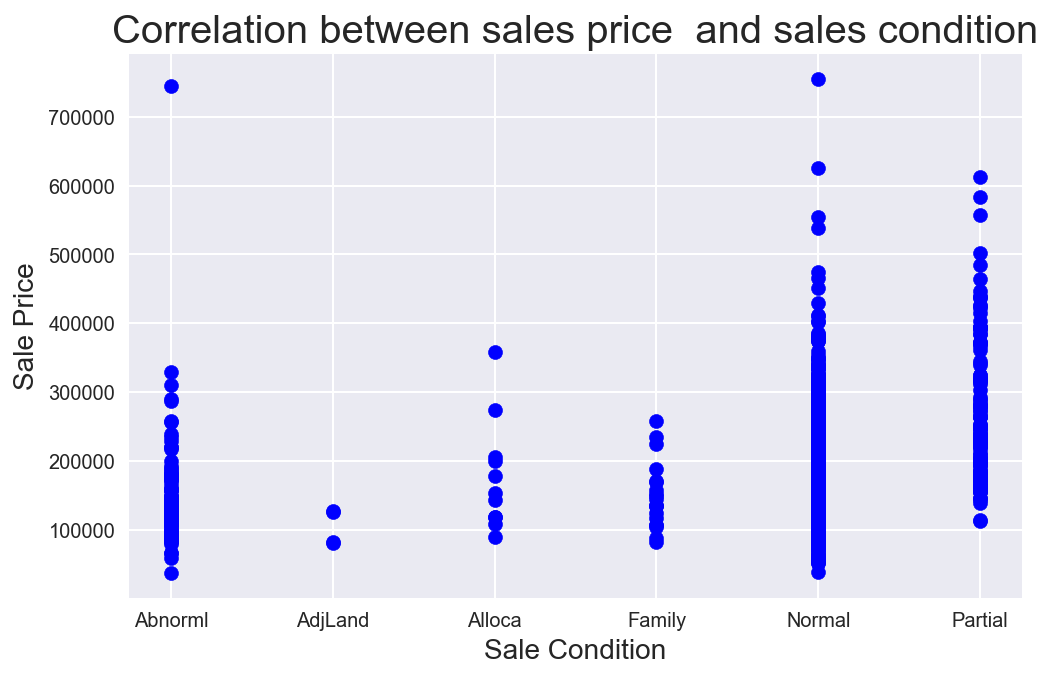

In [139]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.set_xlabel('Sale Condition', fontsize=14)
ax.set_ylabel('Sale Price', fontsize=14)
ax.set_title('Correlation between sales price  and sales condition', fontsize=20)
plt.scatter(x = resbef2010['SaleCondition'] ,y=resbef2010['SalePrice'],c='b')


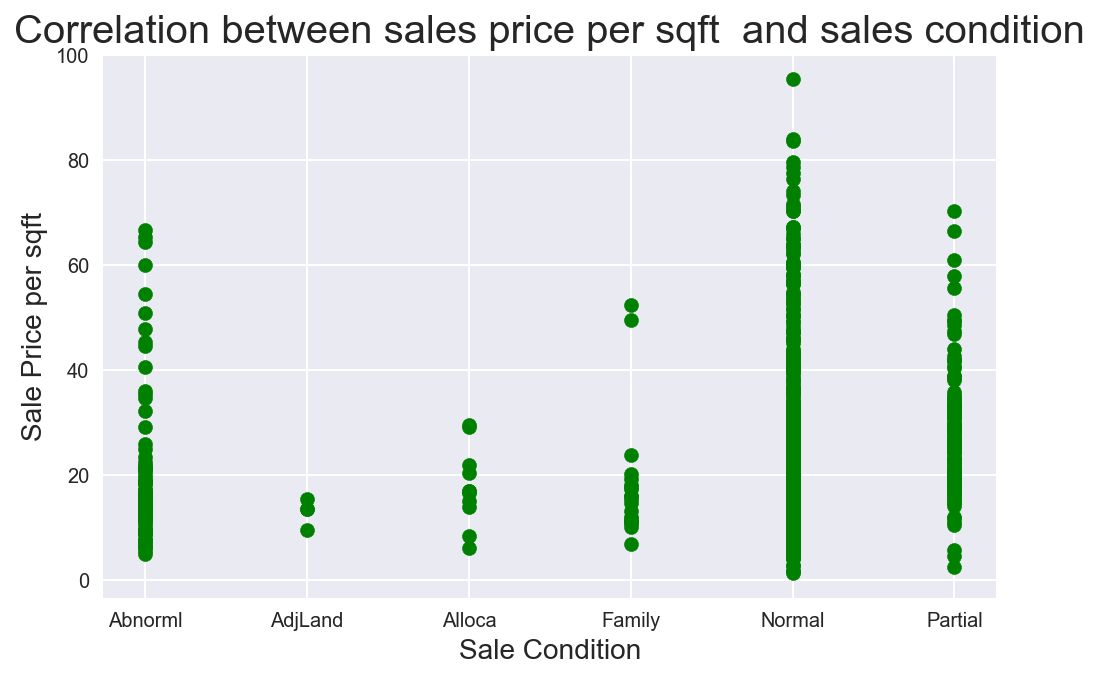

In [140]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.set_xlabel('Sale Condition', fontsize=14)
ax.set_ylabel('Sale Price per sqft', fontsize=14)
ax.set_title('Correlation between sales price per sqft  and sales condition', fontsize=20)
plt.scatter(x = resbef2010['SaleCondition'] ,y=resbef2010['NewSalespersqft'],c='g')

In [141]:
Abnormal=res[res.SaleCondition =="Abnorml"]

Abnormal

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NewSalespersqft,NLotArea
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686,9.164296
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,21.225490,8.719317
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1965,Hip,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,504,Unf,0,525,1029,GasA,TA,Y,SBrkr,1339,0,0,1339,0,0,1,0,3,1,TA,6,Min1,0,NaN,Attchd,1958.0,Unf,1,294,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000,18.386243,8.930626
38,39,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000,13.759152,8.977399
40,41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1965,1965,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,101.0,TA,TA,CBlock,TA,TA,No,Rec,643,Unf,0,445,1088,GasA,Ex,Y,SBrkr,1324,0,0,1324,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1965.0,RFn,2,440,TA,TA,Y,0,138,0,0,0,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,160000,18.480018,9.066239
46,47,50,RL,48.0,12822,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,No,GLQ,1351,Unf,0,83,1434,GasA,Ex,Y,SBrkr,1518,631,0,2149,1,0,1,1,1,1,Gd,6,Typ,1,Ex,Attchd,2003.0,RFn,2,670,TA,TA,Y,168,43,0,0,198,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,239686,18.693340,9.458918
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,8,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,456.0,Gd,TA,PConc,Gd,TA,No,GLQ,649,Unf,0,321,970,GasA,Ex,Y,SBrkr,983,756,0,1739,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1999.0,Fin,2,480,TA,TA,Y,115,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500,65.217391,7.880426
91,92,20,RL,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,3,1961,1961,Hip,CompShg,HdBoard,HdBoard,BrkCmn,203.0,TA,TA,CBlock,TA,TA,No,Rec,600,Unf,0,635,1235,GasA,TA,Y,SBrkr,1235,0,0,1235,0,0,1,0,2,1,TA,6,Typ,0,NaN,Attchd,1961.0,Unf,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,98600,11.600000,9.047821
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,108,Unf,0,350,458,GasA,Fa,N,SBrkr,835,0,0,835,0,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,1920.0,Unf,1,366,Fa,TA,Y,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000,7.811765,9.2709

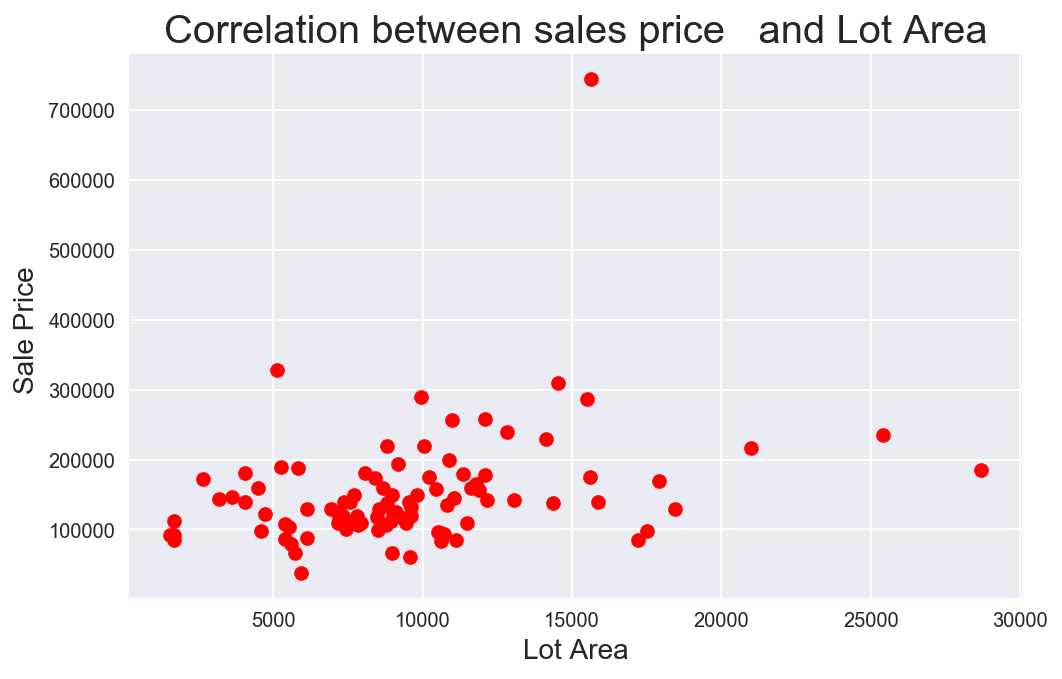

In [142]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.set_xlabel('Lot Area', fontsize=14)
ax.set_ylabel('Sale Price ', fontsize=14)
ax.set_title('Correlation between sales price   and Lot Area', fontsize=20)
plt.scatter(x = Abnormal['LotArea'] ,y=Abnormal['SalePrice'],c='r')

In [143]:
print(resbef2010.groupby('LotArea')[['SalePrice']].mean())

             SalePrice
LotArea               
1300     124000.000000
1477      80000.000000
1491      75500.000000
1526      86000.000000
1533      94500.000000
1596      91000.000000
1680     101640.000000
1869     106000.000000
1890      97000.000000
1920     122500.000000
1936      84500.000000
1950     151000.000000
1953      83000.000000
1974      83500.000000
2001      75000.000000
2016     106000.000000
2117     174333.333333
2160     160000.000000
2217      88000.000000
2268     173000.000000
2280     157966.666667
2289     148500.000000
2308     151000.000000
2368     125000.000000
2448     154000.000000
2500     155000.000000
2522     132500.000000
2544     147400.000000
2572     155000.000000
2592      85000.000000
2628     175500.000000
2645     173250.000000
2651     165000.000000
2665     121000.000000
2887     173000.000000
3000     173733.000000
3010     167240.000000
3013     213490.000000
3072     178740.000000
3136     171750.000000
3180     147576.000000
3182     17

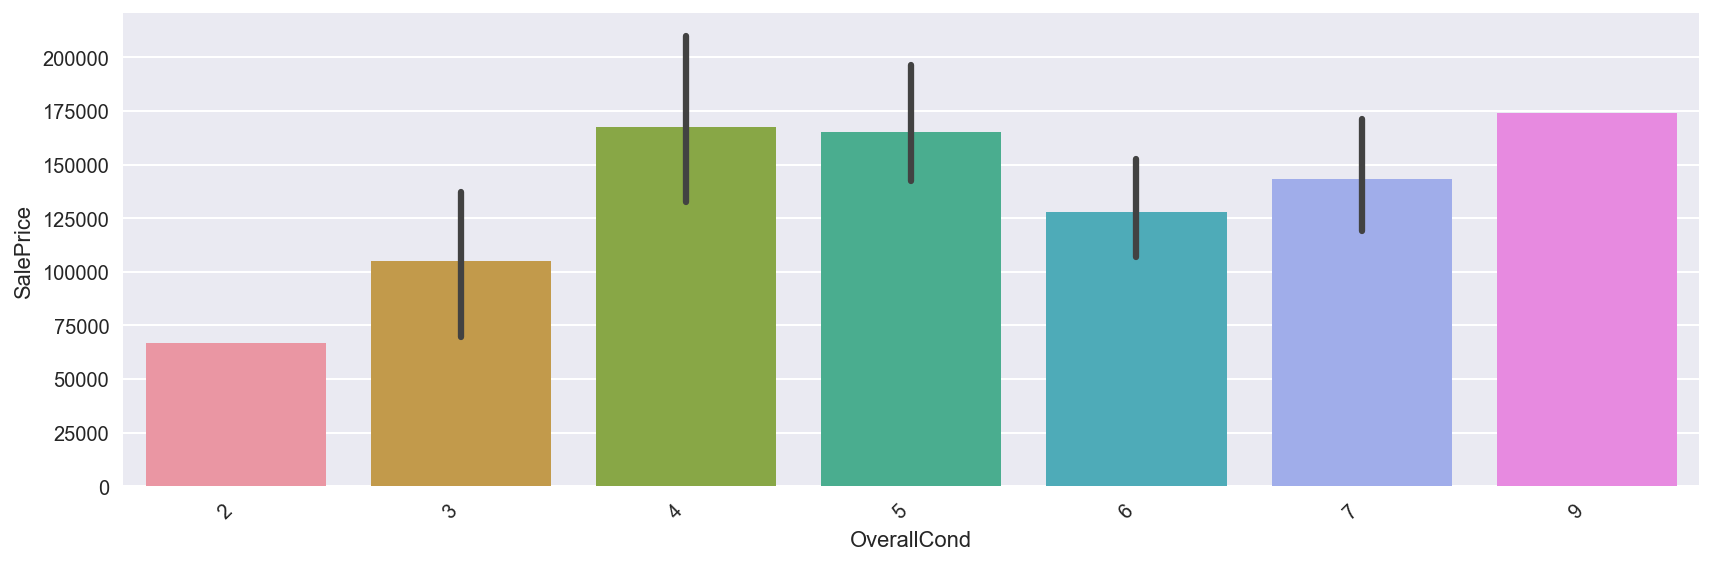

In [144]:
sns.factorplot(x='OverallCond', y='SalePrice', 
               data=Abnormal, kind='bar', aspect=3).set_xticklabels(rotation=45, horizontalalignment='right')

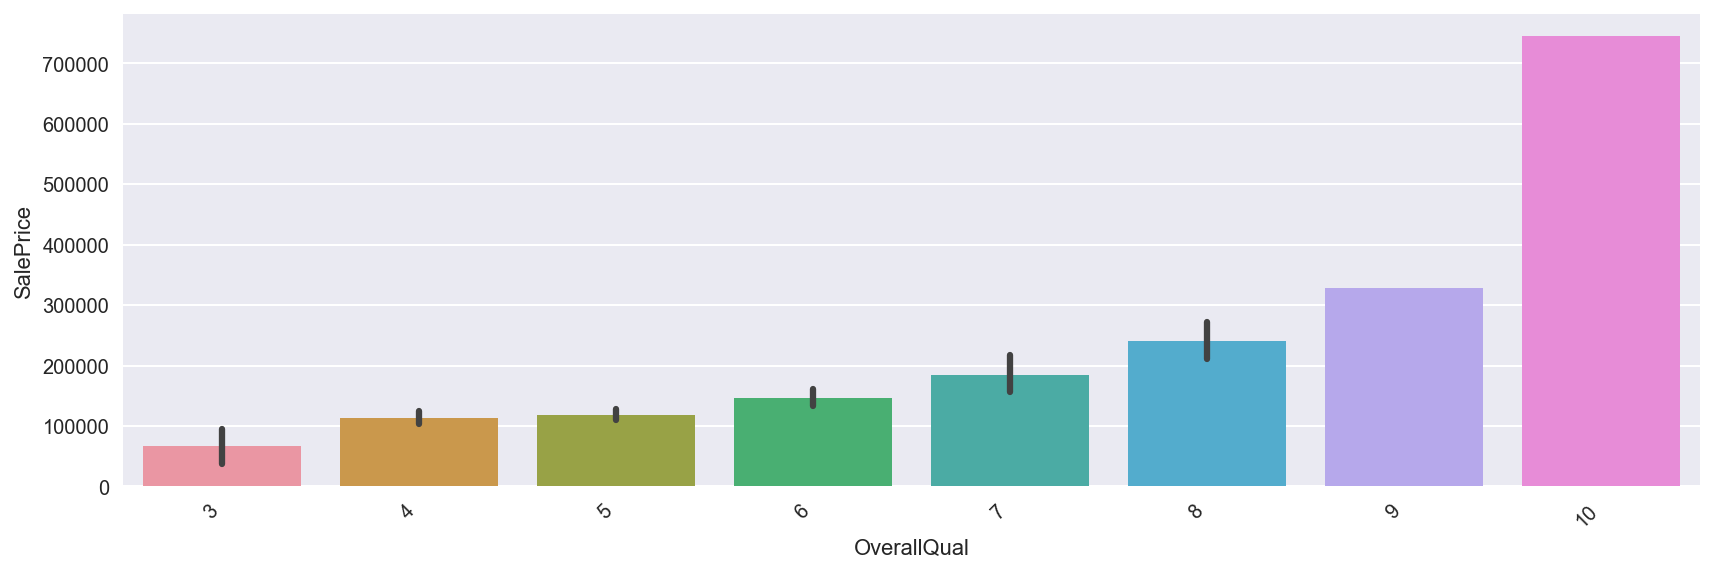

In [145]:
sns.factorplot(x='OverallQual', y='SalePrice', 
               data=Abnormal, kind='bar', aspect=3).set_xticklabels(rotation=45, horizontalalignment='right')

In [146]:
newres=resbef2010


In [147]:
newscale=resbef2010.groupby('NLotArea')[['NewSalespersqft']].mean()

In [148]:
newscale

,NewSalespersqft
NLotArea,
7.170120,95.384615
7.297768,54.163846
7.307202,50.637156
7.330405,56.356488
7.334982,61.643836
7.375256,57.017544
7.426549,60.500000
7.533159,56.714821
7.544332,51.322751


In [149]:
# all_names_index = newscale.set_index(['NewSalespersqft','NLotArea']).sort_index()

In [150]:
# sns.lmplot(x='NLotArea', y='NewSalespersqft', data=newscale)

# plt.scatter(x = newscale[['NLotArea']] ,y=newscale[['NewSalespersqft']],c='g')

In [151]:

newresbef2010 = pd.concat([resbef2010, pd.get_dummies(resbef2010['SaleCondition'],prefix='Salecond_')], axis=1)

In [152]:
newresbef2010.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NewSalespersqft,NLotArea,MSZonetype__FV,MSZonetype__RH,MSZonetype__RL,MSZonetype__RM,LotShapetype__IR1,LotShapetype__IR2,LotShapetype__IR3,LotShapetype__Reg,Utilitiestype__AllPub,Utilitiestype__NoSeWa,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,Heatingtype__Floor,Heatingtype__GasA,Heatingtype__GasW,Heatingtype__Grav,Heatingtype__OthW,Heatingtype__Wall,CentralAirtype__N,CentralAirtype__Y,Electricaltype__FuseA,Electricaltype__FuseF,Electricaltype__FuseP,Electricaltype__Mix,Electricaltype__SBrkr,Neighborhoodtype__Blmngtn,Neighborhoodtype__Blueste,Neighborhoodtype__BrDale,Neighborhoodtype__BrkSide,Neighborhoodtype__ClearCr,Neighborhoodtype__CollgCr,Neighborhoodtype__Crawfor,Neighborhoodtype__Edwards,Neighborhoodtype__Gilbert,Neighborhoodtype__IDOTRR,Neighborhoodtype__MeadowV,Neighborhoodtype__Mitchel,Neighborhoodtype__NAmes,Neighborhoodtype__NPkVill,Neighborhoodtype__NWAmes,Neighborhoodtype__NoRidge,Neighborhoodtype__NridgHt,Neighborhoodtype__OldTown,Neighborhoodtype__SWISU,Neighborhoodtype__Sawyer,Neighborhoodtype__SawyerW,Neighborhoodtype__Somerst,Neighborhoodtype__StoneBr,Neighborhoodtype__Timber,Neighborhoodtype__Veenker,KitchenQualtype__Ex,KitchenQualtype__Fa,KitchenQualtype__Gd,KitchenQualtype__TA,Fucntionaltype__Maj1,Fucntionaltype__Maj2,Fucntionaltype__Min1,Fucntionaltype__Min2,Fucntionaltype__Mod,Fucntionaltype__Sev,Fucntionaltype__Typ,FireplaceQutype__Ex,FireplaceQutype__Fa,FireplaceQutype__Gd,FireplaceQutype__Po,FireplaceQutype__TA,RoofMatltype__ClyTile,RoofMatltype__CompShg,RoofMatltype__Membran,RoofMatltype__Metal,RoofMatltype__Roll,RoofMatltype__Tar&Grv,RoofMatltype__WdShake,RoofMatltype__WdShngl,GarageQualtype__Ex,GarageQualtype__Fa,GarageQualtype__Gd,GarageQualtype__Po,GarageQualtype__TA,HouseStyletype__1.5Fin,HouseStyletype__1.5Unf,HouseStyletype__1Story,HouseStyletype__2.5Fin,HouseStyletype__2.5Unf,HouseStyletype__2Story,HouseStyletype__SFoyer,HouseStyletype__SLvl,Bldgtype__1Fam,Bldgtype__2fmCon,Bldgtype__Duplex,Bldgtype__Twnhs,Bldgtype__TwnhsE,Utiltype__AllPub,Utiltype__NoSeWa,y_pred,Residuals,Salecond__Abnorml,Salecond__AdjLand,Salecond__Alloca,Salecond__Family,Salecond__Normal,Salecond__Partial
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,9.041922,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,22.571296,2.103260,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.90625

In [153]:
# check how many columns have null values 

newresbef2010.isnull().sum()

Id                              0
MSSubClass                      0
MSZoning                        0
LotFrontage                   259
LotArea                         0
Street                          0
Alley                        1361
LotShape                        0
LandContour                     0
Utilities                       0
LotConfig                       0
LandSlope                       0
Neighborhood                    0
Condition1                      0
Condition2                      0
BldgType                        0
HouseStyle                      0
OverallQual                     0
OverallCond                     0
YearBuilt                       0
YearRemodAdd                    0
RoofStyle                       0
RoofMatl                        0
Exterior1st                     0
Exterior2nd                     0
MasVnrType                      8
MasVnrArea                      8
ExterQual                       0
ExterCond                       0
Foundation    

In [154]:
# Remove columns which are unlikely to be factors and which contain  null values  
# Remove name, ticket, and cabin.
newresbef2010.drop('LotFrontage', inplace=True, axis=1)
newresbef2010.drop('BsmtQual', inplace=True, axis=1)
newresbef2010.drop('BsmtCond', inplace=True, axis=1)
newresbef2010.drop('Alley', inplace=True, axis=1)
newresbef2010.drop('BsmtExposure', inplace=True, axis=1)
newresbef2010.drop('BsmtFinType1', inplace=True, axis=1)
newresbef2010.drop('BsmtFinType2', inplace=True, axis=1)
newresbef2010.drop('Electrical', inplace=True, axis=1)
newresbef2010.drop('FireplaceQu', inplace=True, axis=1)
newresbef2010.drop('GarageType', inplace=True, axis=1)
newresbef2010.drop('GarageYrBlt', inplace=True, axis=1)
newresbef2010.drop('GarageFinish', inplace=True, axis=1)
newresbef2010.drop('PoolQC', inplace=True, axis=1)
newresbef2010.drop('Fence', inplace=True, axis=1)
newresbef2010.drop('MiscFeature', inplace=True, axis=1)
newresbef2010.drop('MSZoning', inplace=True, axis=1)
newresbef2010.drop('Street', inplace=True, axis=1)
newresbef2010.drop('LotShape', inplace=True, axis=1)
newresbef2010.drop('LandContour', inplace=True, axis=1)
newresbef2010.drop('Utilities', inplace=True, axis=1)
newresbef2010.drop('LotConfig', inplace=True, axis=1)
newresbef2010.drop('Neighborhood', inplace=True, axis=1)
newresbef2010.drop('Condition1', inplace=True, axis=1)
newresbef2010.drop('Condition2', inplace=True, axis=1)
newresbef2010.drop('BldgType', inplace=True, axis=1)
newresbef2010.drop('HouseStyle', inplace=True, axis=1)
newresbef2010.drop('RoofStyle', inplace=True, axis=1)
newresbef2010.drop('RoofMatl', inplace=True, axis=1)
newresbef2010.drop('ExterQual', inplace=True, axis=1)
newresbef2010.drop('Exterior1st', inplace=True, axis=1)
newresbef2010.drop('Exterior2nd', inplace=True, axis=1)
newresbef2010.drop('MasVnrType', inplace=True, axis=1)
newresbef2010.drop('ExterCond', inplace=True, axis=1)
newresbef2010.drop('Foundation', inplace=True, axis=1)
newresbef2010.drop('BsmtFinSF1', inplace=True, axis=1)
newresbef2010.drop('BsmtFinSF2', inplace=True, axis=1)
newresbef2010.drop('Heating', inplace=True, axis=1)
newresbef2010.drop('HeatingQC', inplace=True, axis=1)
newresbef2010.drop('CentralAir', inplace=True, axis=1)
newresbef2010.drop('KitchenQual', inplace=True, axis=1)
newresbef2010.drop('Functional', inplace=True, axis=1)
newresbef2010.drop('BsmtUnfSF', inplace=True, axis=1)
newresbef2010.drop('Fireplaces', inplace=True, axis=1)
newresbef2010.drop('GarageQual', inplace=True, axis=1)
newresbef2010.drop('GarageCond', inplace=True, axis=1)
newresbef2010.drop('PavedDrive', inplace=True, axis=1)
newresbef2010.drop('MiscVal', inplace=True, axis=1)
newresbef2010.drop('LandSlope', inplace=True, axis=1)
newresbef2010.drop('SaleType', inplace=True, axis=1)
newresbef2010.drop('SaleCondition', inplace=True, axis=1)
newresbef2010.drop('y_pred', inplace=True, axis=1)
newresbef2010.drop('Residuals', inplace=True, axis=1)
newresbef2010.drop('Salecond__Normal', inplace=True, axis=1) 
newresbef2010.drop('MasVnrArea', inplace=True, axis=1)

In [157]:
newresbef2010.isnull().sum()

Id                           0
MSSubClass                   0
LotArea                      0
OverallQual                  0
OverallCond                  0
YearBuilt                    0
YearRemodAdd                 0
TotalBsmtSF                  0
1stFlrSF                     0
2ndFlrSF                     0
LowQualFinSF                 0
GrLivArea                    0
BsmtFullBath                 0
BsmtHalfBath                 0
FullBath                     0
HalfBath                     0
BedroomAbvGr                 0
KitchenAbvGr                 0
TotRmsAbvGrd                 0
GarageCars                   0
GarageArea                   0
WoodDeckSF                   0
OpenPorchSF                  0
EnclosedPorch                0
3SsnPorch                    0
ScreenPorch                  0
PoolArea                     0
MoSold                       0
YrSold                       0
SalePrice                    0
NewSalespersqft              0
NLotArea                     0
MSZonety

In [158]:
newresbef2010.dtypes

Id                             int64
MSSubClass                     int64
LotArea                        int64
OverallQual                    int64
OverallCond                    int64
YearBuilt                      int64
YearRemodAdd                   int64
TotalBsmtSF                    int64
1stFlrSF                       int64
2ndFlrSF                       int64
LowQualFinSF                   int64
GrLivArea                      int64
BsmtFullBath                   int64
BsmtHalfBath                   int64
FullBath                       int64
HalfBath                       int64
BedroomAbvGr                   int64
KitchenAbvGr                   int64
TotRmsAbvGrd                   int64
GarageCars                     int64
GarageArea                     int64
WoodDeckSF                     int64
OpenPorchSF                    int64
EnclosedPorch                  int64
3SsnPorch                      int64
ScreenPorch                    int64
PoolArea                       int64
M

In [159]:
# Check for Nan cells 
newresbef2010.isnull().sum().sum()

nan_rows = newresbef2010[newresbef2010.isnull().T.any().T]

nan_rows

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,NewSalespersqft,NLotArea,MSZonetype__FV,MSZonetype__RH,MSZonetype__RL,MSZonetype__RM,LotShapetype__IR1,LotShapetype__IR2,LotShapetype__IR3,LotShapetype__Reg,Utilitiestype__AllPub,Utilitiestype__NoSeWa,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,Heatingtype__Floor,Heatingtype__GasA,Heatingtype__GasW,Heatingtype__Grav,Heatingtype__OthW,Heatingtype__Wall,CentralAirtype__N,CentralAirtype__Y,Electricaltype__FuseA,Electricaltype__FuseF,Electricaltype__FuseP,Electricaltype__Mix,Electricaltype__SBrkr,Neighborhoodtype__Blmngtn,Neighborhoodtype__Blueste,Neighborhoodtype__BrDale,Neighborhoodtype__BrkSide,Neighborhoodtype__ClearCr,Neighborhoodtype__CollgCr,Neighborhoodtype__Crawfor,Neighborhoodtype__Edwards,Neighborhoodtype__Gilbert,Neighborhoodtype__IDOTRR,Neighborhoodtype__MeadowV,Neighborhoodtype__Mitchel,Neighborhoodtype__NAmes,Neighborhoodtype__NPkVill,Neighborhoodtype__NWAmes,Neighborhoodtype__NoRidge,Neighborhoodtype__NridgHt,Neighborhoodtype__OldTown,Neighborhoodtype__SWISU,Neighborhoodtype__Sawyer,Neighborhoodtype__SawyerW,Neighborhoodtype__Somerst,Neighborhoodtype__StoneBr,Neighborhoodtype__Timber,Neighborhoodtype__Veenker,KitchenQualtype__Ex,KitchenQualtype__Fa,KitchenQualtype__Gd,KitchenQualtype__TA,Fucntionaltype__Maj1,Fucntionaltype__Maj2,Fucntionaltype__Min1,Fucntionaltype__Min2,Fucntionaltype__Mod,Fucntionaltype__Sev,Fucntionaltype__Typ,FireplaceQutype__Ex,FireplaceQutype__Fa,FireplaceQutype__Gd,FireplaceQutype__Po,FireplaceQutype__TA,RoofMatltype__ClyTile,RoofMatltype__CompShg,RoofMatltype__Membran,RoofMatltype__Metal,RoofMatltype__Roll,RoofMatltype__Tar&Grv,RoofMatltype__WdShake,RoofMatltype__WdShngl,GarageQualtype__Ex,GarageQualtype__Fa,GarageQualtype__Gd,GarageQualtype__Po,GarageQualtype__TA,HouseStyletype__1.5Fin,HouseStyletype__1.5Unf,HouseStyletype__1Story,HouseStyletype__2.5Fin,HouseStyletype__2.5Unf,HouseStyletype__2Story,HouseStyletype__SFoyer,HouseStyletype__SLvl,Bldgtype__1Fam,Bldgtype__2fmCon,Bldgtype__Duplex,Bldgtype__Twnhs,Bldgtype__TwnhsE,Utiltype__AllPub,Utiltype__NoSeWa,Salecond__Abnorml,Salecond__AdjLand,Salecond__Alloca,Salecond__Family,Salecond__Partial


In [160]:
list(newresbef2010.columns)

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'YrSold',
 'SalePrice',
 'NewSalespersqft',
 'NLotArea',
 'MSZonetype__FV',
 'MSZonetype__RH',
 'MSZonetype__RL',
 'MSZonetype__RM',
 'LotShapetype__IR1',
 'LotShapetype__IR2',
 'LotShapetype__IR3',
 'LotShapetype__Reg',
 'Utilitiestype__AllPub',
 'Utilitiestype__NoSeWa',
 'SaleType__COD',
 'SaleType__CWD',
 'SaleType__Con',
 'SaleType__ConLD',
 'SaleType__ConLI',
 'SaleType__ConLw',
 'SaleType__New',
 'SaleType__Oth',
 'SaleType__WD',
 'Heatingtype__Floor',
 'Heatingtype__GasA',
 'Heatingtype__GasW',
 'Heatingtype__Grav',
 'Heatingtype__OthW',
 'Heatingtype__Wall',
 'CentralAir

In [161]:
# Find if there are any -negative values

newresbef2010.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,NewSalespersqft,NLotArea,MSZonetype__FV,MSZonetype__RH,MSZonetype__RL,MSZonetype__RM,LotShapetype__IR1,LotShapetype__IR2,LotShapetype__IR3,LotShapetype__Reg,Utilitiestype__AllPub,Utilitiestype__NoSeWa,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,Heatingtype__Floor,Heatingtype__GasA,Heatingtype__GasW,Heatingtype__Grav,Heatingtype__OthW,Heatingtype__Wall,CentralAirtype__N,CentralAirtype__Y,Electricaltype__FuseA,Electricaltype__FuseF,Electricaltype__FuseP,Electricaltype__Mix,Electricaltype__SBrkr,Neighborhoodtype__Blmngtn,Neighborhoodtype__Blueste,Neighborhoodtype__BrDale,Neighborhoodtype__BrkSide,Neighborhoodtype__ClearCr,Neighborhoodtype__CollgCr,Neighborhoodtype__Crawfor,Neighborhoodtype__Edwards,Neighborhoodtype__Gilbert,Neighborhoodtype__IDOTRR,Neighborhoodtype__MeadowV,Neighborhoodtype__Mitchel,Neighborhoodtype__NAmes,Neighborhoodtype__NPkVill,Neighborhoodtype__NWAmes,Neighborhoodtype__NoRidge,Neighborhoodtype__NridgHt,Neighborhoodtype__OldTown,Neighborhoodtype__SWISU,Neighborhoodtype__Sawyer,Neighborhoodtype__SawyerW,Neighborhoodtype__Somerst,Neighborhoodtype__StoneBr,Neighborhoodtype__Timber,Neighborhoodtype__Veenker,KitchenQualtype__Ex,KitchenQualtype__Fa,KitchenQualtype__Gd,KitchenQualtype__TA,Fucntionaltype__Maj1,Fucntionaltype__Maj2,Fucntionaltype__Min1,Fucntionaltype__Min2,Fucntionaltype__Mod,Fucntionaltype__Sev,Fucntionaltype__Typ,FireplaceQutype__Ex,FireplaceQutype__Fa,FireplaceQutype__Gd,FireplaceQutype__Po,FireplaceQutype__TA,RoofMatltype__ClyTile,RoofMatltype__CompShg,RoofMatltype__Membran,RoofMatltype__Metal,RoofMatltype__Roll,RoofMatltype__Tar&Grv,RoofMatltype__WdShake,RoofMatltype__WdShngl,GarageQualtype__Ex,GarageQualtype__Fa,GarageQualtype__Gd,GarageQualtype__Po,GarageQualtype__TA,HouseStyletype__1.5Fin,HouseStyletype__1.5Unf,HouseStyletype__1Story,HouseStyletype__2.5Fin,HouseStyletype__2.5Unf,HouseStyletype__2Story,HouseStyletype__SFoyer,HouseStyletype__SLvl,Bldgtype__1Fam,Bldgtype__2fmCon,Bldgtype__Duplex,Bldgtype__Twnhs,Bldgtype__TwnhsE,Utiltype__AllPub,Utiltype__NoSeWa,Salecond__Abnorml,Salecond__AdjLand,Salecond__Alloca,Salecond__Family,Salecond__Partial
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000

In [162]:
# This list of column names will come in handy later.
cols = list(newresbef2010.columns)
cols.remove('Salecond__Abnorml')

# cols
X = newresbef2010[cols]
y = newresbef2010.Salecond__Abnorml.values


In [163]:
# Features=['MSSubClass',
#  'LotArea',
#  'OverallQual',
#  'OverallCond',
#  'YearBuilt',
#  'YearRemodAdd',
#  'TotalBsmtSF',
#  '1stFlrSF',
#  '2ndFlrSF',
#  'LowQualFinSF',
#  'GrLivArea',
#  'BsmtFullBath',
#  'BsmtHalfBath',
#  'FullBath',
#  'HalfBath',
#  'BedroomAbvGr',
#  'KitchenAbvGr',
#  'TotRmsAbvGrd',
#  'GarageCars',
#  'GarageArea',
#  'WoodDeckSF',
#  'OpenPorchSF',
#  'EnclosedPorch',
#  '3SsnPorch',
#  'ScreenPorch',
#  'PoolArea',
#  'MoSold',
#  'YrSold',
#  'SalePrice',
#  'NewSalespersqft',
#  'NLotArea',
#  'MSZonetype__FV',
#  'MSZonetype__RH',
#  'MSZonetype__RL',
#  'MSZonetype__RM',
#  'LotShapetype__IR1',
#  'LotShapetype__IR2',
#  'LotShapetype__IR3',
#  'LotShapetype__Reg',
#  'Utilitiestype__AllPub',
#  'Utilitiestype__NoSeWa',
#  'SaleType__COD',
#  'SaleType__CWD',
#  'SaleType__Con',
#  'SaleType__ConLD',
#  'SaleType__ConLI',
#  'SaleType__ConLw',
#  'SaleType__New',
#  'SaleType__Oth',
#  'SaleType__WD',
#  'Heatingtype__Floor',
#  'Heatingtype__GasA',
#  'Heatingtype__GasW',
#  'Heatingtype__Grav',
#  'Heatingtype__OthW',
#  'Heatingtype__Wall',
#  'CentralAirtype__N',
#  'CentralAirtype__Y',
#  'Electricaltype__FuseA',
#  'Electricaltype__FuseF',
#  'Electricaltype__FuseP',
#  'Electricaltype__Mix',
#  'Electricaltype__SBrkr',
#  'Neighborhoodtype__Blmngtn',
#  'Neighborhoodtype__Blueste',
#  'Neighborhoodtype__BrDale',
#  'Neighborhoodtype__BrkSide',
#  'Neighborhoodtype__ClearCr',
#  'Neighborhoodtype__CollgCr',
#  'Neighborhoodtype__Crawfor',
#  'Neighborhoodtype__Edwards',
#  'Neighborhoodtype__Gilbert',
#  'Neighborhoodtype__IDOTRR',
#  'Neighborhoodtype__MeadowV',
#  'Neighborhoodtype__Mitchel',
#  'Neighborhoodtype__NAmes',
#  'Neighborhoodtype__NPkVill',
#  'Neighborhoodtype__NWAmes',
#  'Neighborhoodtype__NoRidge',
#  'Neighborhoodtype__NridgHt',
#  'Neighborhoodtype__OldTown',
#  'Neighborhoodtype__SWISU',
#  'Neighborhoodtype__Sawyer',
#  'Neighborhoodtype__SawyerW',
#  'Neighborhoodtype__Somerst',
#  'Neighborhoodtype__StoneBr',
#  'Neighborhoodtype__Timber',
#  'Neighborhoodtype__Veenker',
#  'KitchenQualtype__Ex',
#  'KitchenQualtype__Fa',
#  'KitchenQualtype__Gd',
#  'KitchenQualtype__TA',
#  'Fucntionaltype__Maj1',
#  'Fucntionaltype__Maj2',
#  'Fucntionaltype__Min1',
#  'Fucntionaltype__Min2',
#  'Fucntionaltype__Mod',
#  'Fucntionaltype__Sev',
#  'Fucntionaltype__Typ',
#  'FireplaceQutype__Ex',
#  'FireplaceQutype__Fa',
#  'FireplaceQutype__Gd',
#  'FireplaceQutype__Po',
#  'FireplaceQutype__TA',
#  'RoofMatltype__ClyTile',
#  'RoofMatltype__CompShg',
#  'RoofMatltype__Membran',
#  'RoofMatltype__Metal',
#  'RoofMatltype__Roll',
#  'RoofMatltype__Tar&Grv',
#  'RoofMatltype__WdShake',
#  'RoofMatltype__WdShngl',
#  'GarageQualtype__Ex',
#  'GarageQualtype__Fa',
#  'GarageQualtype__Gd',
#  'GarageQualtype__Po',
#  'GarageQualtype__TA',
#  'HouseStyletype__1.5Fin',
#  'HouseStyletype__1.5Unf',
#  'HouseStyletype__1Story',
#  'HouseStyletype__2.5Fin',
#  'HouseStyletype__2.5Unf',
#  'HouseStyletype__2Story',
#  'HouseStyletype__SFoyer',
#  'HouseStyletype__SLvl',
#  'Bldgtype__1Fam',
#  'Bldgtype__2fmCon',
#  'Bldgtype__Duplex',
#  'Bldgtype__Twnhs',
#  'Bldgtype__TwnhsE',
#  'Utiltype__AllPub',
#  'Utiltype__NoSeWa',
#  'y_pred',
#  'Residuals',
#  'Salecond__AdjLand',
#  'Salecond__Alloca',
#  'Salecond__Family',
#  'Salecond__Normal']

In [164]:
# Method 2 .  Feature Selection
# Let's use the SelectKBest method in scikit-learn to see which are the top five features. 
# Also load the f_classif and chi2 functions, which will be our metrics to evaluate what makes a variable the "best."

# from sklearn.feature_selection import SelectKBest, f_classif, chi2
# What are the top five features for X using f_classif?
# What are the top five features for X using chi2?
# The F-test is explained variance divided by unexplained variance. High numbers will result if our explained variance (what we know) is much greater than our unexplained variance (what we don't know). 
# The chi2 goodness of fit is the sum of the difference squared between observed and expected, divided by expected.

# from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Build the selector — we'll build one with each score type.
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# Train the selector on the data.
skb_f.fit(X, y)
skb_chi2.fit(X, y)

# Examine the results.
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest

,feature,f_classif,chi2 score
42,SaleType__COD,188.563,162.343
49,SaleType__Oth,43.6172,42.3125
50,SaleType__WD,27.2146,3.48665
6,YearRemodAdd,22.426,4.70249
33,MSZonetype__RH,16.0277,15.6989
29,SalePrice,15.8149,540250
40,Utilitiestype__AllPub,14.233,0.00973372
131,Utiltype__AllPub,14.233,0.00973372
41,Utilitiestype__NoSeWa,14.233,14.1042
98,Fucntionaltype__Sev,14.233,14.1042


Top 5 features that contribute to the fitness of the model using SelectKBest method
SaleType__COD  188.563	162.343
SaleType__Oth	43.6172	42.3125
SaleType__WD	27.2146	3.48665
YearRemodAdd	22.426	4.70249
MSZonetype__RH	16.0277	15.6989

Sale Type (Nominal): Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [165]:
# Method 2
# Using Recursive Feature Elimination (RFE)
# Scikit-learn also offers recursive feature elimination as a class named RFECV. Use it in combination with a logistic regression model to see what features would be kept with this method.

# When instantiating the RFECV:

# step indicates what percent of features (or number of features if an integer) to remove at each iteration.
# cv indicates the number of cross-validation folds to use for evaluating what features are important.
# Store the columns in a variable called rfecv_columns.

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
selector = RFECV(lr, step=1, cv=10)
selector = selector.fit(X, y)

print selector.support_
print selector.ranking_

[False False False False  True False False False False False False False
 False  True  True  True False  True False False False False False False
 False False False False False False False False  True  True False False
 False False  True False False  True  True  True False False False  True
  True  True  True False  True  True False False False False  True False
 False False  True False  True False  True False False  True False  True
  True False False False False False False  True  True False False False
 False False False False  True  True  True False  True  True False False
  True  True  True False  True  True  True  True False False False False
 False False  True  True False False False  True  True  True False  True
  True  True  True False  True  True  True False  True  True False False
  True  True  True  True  True]
[55 30 56 15  1 51 37 52 61 53 50 46 25  1  1  1 18  1 44 78 49 54 48 47 42
 43 41 38 36 57 28 27  1  1 68 22 40 33  1 35 31  1  1  1 79 24  5  1  1  1
  1 75  1  1 

In [167]:
# array(['KitchenAbvGr', 
#        'SaleType__Oth', 'SaleType__WD', 'Heatingtype__GasA',
#     , 'CentralAirtype__Y',  'Fucntionaltype__Min2',
#        'Fucntionaltype__Mod',  'FireplaceQutype__Po',
#        , 'GarageQualtype__Po', 'GarageQualtype__TA',
#        'HouseStyletype__1.5Unf', 'HouseStyletype__1Story',
#        'HouseStyletype__2.5Fin', 'HouseStyletype__2.5Unf',
#        'HouseStyletype__SFoyer', 'HouseStyletype__SLvl', 'Bldgtype__1Fam',
#        'Bldgtype__Duplex', 'Bldgtype__Twnhs', 'Utiltype__NoSeWa',
#        'Salecond__AdjLand', 'Salecond__Alloca', 'Salecond__Family',
#        'Salecond__Partial'],
#       dtype='|S25')

In [171]:
# The column names correspond to the ones below. RFECV only excluded a few features.
rfecv_columns = np.array(cols)[selector.support_]
rfecv_columns

array(['OverallCond', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'MSZonetype__FV', 'MSZonetype__RH',
       'LotShapetype__IR3', 'Utilitiestype__NoSeWa', 'SaleType__COD',
       'SaleType__CWD', 'SaleType__ConLw', 'SaleType__New',
       'SaleType__Oth', 'SaleType__WD', 'Heatingtype__GasA',
       'Heatingtype__GasW', 'CentralAirtype__Y', 'Electricaltype__Mix',
       'Neighborhoodtype__Blmngtn', 'Neighborhoodtype__BrDale',
       'Neighborhoodtype__CollgCr', 'Neighborhoodtype__Edwards',
       'Neighborhoodtype__Gilbert', 'Neighborhoodtype__NoRidge',
       'Neighborhoodtype__NridgHt', 'Neighborhoodtype__Veenker',
       'KitchenQualtype__Ex', 'KitchenQualtype__Fa', 'KitchenQualtype__TA',
       'Fucntionaltype__Maj1', 'Fucntionaltype__Min2',
       'Fucntionaltype__Mod', 'Fucntionaltype__Sev', 'FireplaceQutype__Ex',
       'FireplaceQutype__Fa', 'FireplaceQutype__Gd', 'FireplaceQutype__Po',
       'RoofMatltype__Tar&Grv', 'RoofMatltype__WdShake',
       'GarageQua

In [187]:
# eliminating the features that are not deemed to be contibutors ie False

Features = ['SaleType__COD','SaleType__New',  'SaleType__Oth', 'SaleType__WD',   'Heatingtype__GasW',  'Fucntionaltype__Min2',       'Fucntionaltype__Mod',  'FireplaceQutype__Po', \
       'GarageQualtype__Gd', 'GarageQualtype__Po', 'GarageQualtype__TA','HouseStyletype__2.5Unf',  'HouseStyletype__SFoyer', 'HouseStyletype__SLvl', 'Bldgtype__1Fam', \
           'YearRemodAdd','MSZonetype__RH']


X1 = newresbef2010[Features]
y = newresbef2010.Salecond__Abnorml.values

In [189]:
# Method 2 try again using the reduced factors
# Using Recursive Feature Elimination (RFE)
# Scikit-learn also offers recursive feature elimination as a class named RFECV. Use it in combination with a logistic regression model to see what features would be kept with this method.

# When instantiating the RFECV:

# step indicates what percent of features (or number of features if an integer) to remove at each iteration.
# cv indicates the number of cross-validation folds to use for evaluating what features are important.
# Store the columns in a variable called rfecv_columns.

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
selector = RFECV(lr, step=1, cv=10)
selector = selector.fit(X1, y)

print selector.support_
print selector.ranking_

[ True  True  True  True  True False False  True  True  True  True  True
 False  True False False  True]
[1 1 1 1 1 3 2 1 1 1 1 1 5 1 4 6 1]


In [190]:
# The column names correspond to the ones below. RFECV only excluded a few features.
rfecv_columns = np.array(Features)[selector.support_]
rfecv_columns

array(['SaleType__COD', 'SaleType__New', 'SaleType__Oth', 'SaleType__WD',
       'Heatingtype__GasW', 'FireplaceQutype__Po', 'GarageQualtype__Gd',
       'GarageQualtype__Po', 'GarageQualtype__TA',
       'HouseStyletype__2.5Unf', 'HouseStyletype__SLvl', 'MSZonetype__RH'],
      dtype='|S22')

Features that contribute to the model fit using Recursive Feature Elimination
'SaleType__COD', 
'SaleType__Oth', 
'SaleType__WD',

'SaleType__New',
'Heatingtype__GasW',   
'HouseStyletype__2.5Unf', 
'HouseStyletype__SLvl'
       
        
This is consistent with the Selectbest model results
       
Top 5 features that contribute to the fitness of the model using SelectKBest method
SaleType__COD  188.563	162.343
SaleType__Oth	43.6172	42.3125
SaleType__WD	27.2146	3.48665

YearRemodAdd	22.426	4.70249
MSZonetype__RH	16.0277	15.6989

In [168]:
# Method 3 Feature Elimination Using the Lasso Penalty
# The L1 penalty is a popular method for feature selection. As the regularization strength increases, more features will be removed.

# Load the LogisticRegressionCV class.

# 1) Standardize your predictor matrix (required for regularization).

# Create a logistic regression cross-validator object:
# Set penalty='l1' (lasso).
# Set Cs=100 (search 100 different regularization strengths).
# Set solver='liblinear' (required for the lasso penalty).
# Set cv=10 for 10 cross-validation folds.
# Fit on the target and standardized predictors.
# Sort the logistic regression coefficients by absolute value.
# Do the top five correspond to those selected by the F-score and chi2?

# Answer: Not completely. That could be because of scaling. Some features are going to perform better based on the model type, and if we hadn't regularized, some could be perceived as much more significant than they are.

# Choose which ones you would keep and store them in a variable called lr_columns.

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [172]:
from sklearn.linear_model import LogisticRegressionCV

lrcv = LogisticRegressionCV(penalty='l2', Cs=20, cv=5, solver='liblinear')
lrcv.fit(Xs, y)


LogisticRegressionCV(Cs=20, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [191]:
lrcv.C_

array([ 0.00483293])

In [192]:
# What are the best coefficients according to a model using lasso?
coeffs = pd.DataFrame(lrcv.coef_, columns=X.columns)
coeffs_t = coeffs.transpose()
coeffs_t.columns = ['lasso_coefs']
coeffs_abs = coeffs_t.abs().sort_values('lasso_coefs', ascending=False)
coeffs_abs

,lasso_coefs
SaleType__COD,0.190340
SaleType__Oth,0.108552
SaleType__WD,0.080405
Fucntionaltype__Sev,0.067506
MSZonetype__RH,0.061228
Electricaltype__Mix,0.060269
FireplaceQutype__Gd,0.045783
KitchenQualtype__Ex,0.044738
Salecond__Partial,0.044271
GarageQualtype__TA,0.041949


The lasso method results are consistent with the other models

Top 5 features that contribute to the fitness of the model using SelectKBest method
    SaleType__COD	0.190340
    SaleType__Oth	0.108552
    SaleType__WD	0.080405
    MSZonetype__RH	0.061228

In [193]:
# which model scores best ?
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kbest_columns = kbest.feature.values[0:5]
lasso_columns = coeffs_abs.index[coeffs_t.lasso_coefs != 0]

In [194]:
lr = LogisticRegression(C=lrcv.C_[0], penalty='l1', solver='liblinear')

# Defining a function to test our best features head to head.
def score(X):
    scores = cross_val_score(lr, X, y, cv=5)
    return scores.mean(), scores.std()

# A list of all of our lists of best features being executed in the score function.
all_scores = [
    score(X[kbest_columns]),
    score(X[rfecv_columns]),
    score(X[lasso_columns]),
    score(X)]

# Putting results into a DataFrame.
pd.DataFrame(all_scores, columns=['mean score', 'std score'], index = ['kbest', 'rfecv', 'lr', 'all'])

,mean score,std score
kbest,0.933795,0.001265
rfecv,0.933795,0.001265
lr,0.933103,0.001696
all,0.933103,0.001696


mean scores and std scores shows close approximation for all models 

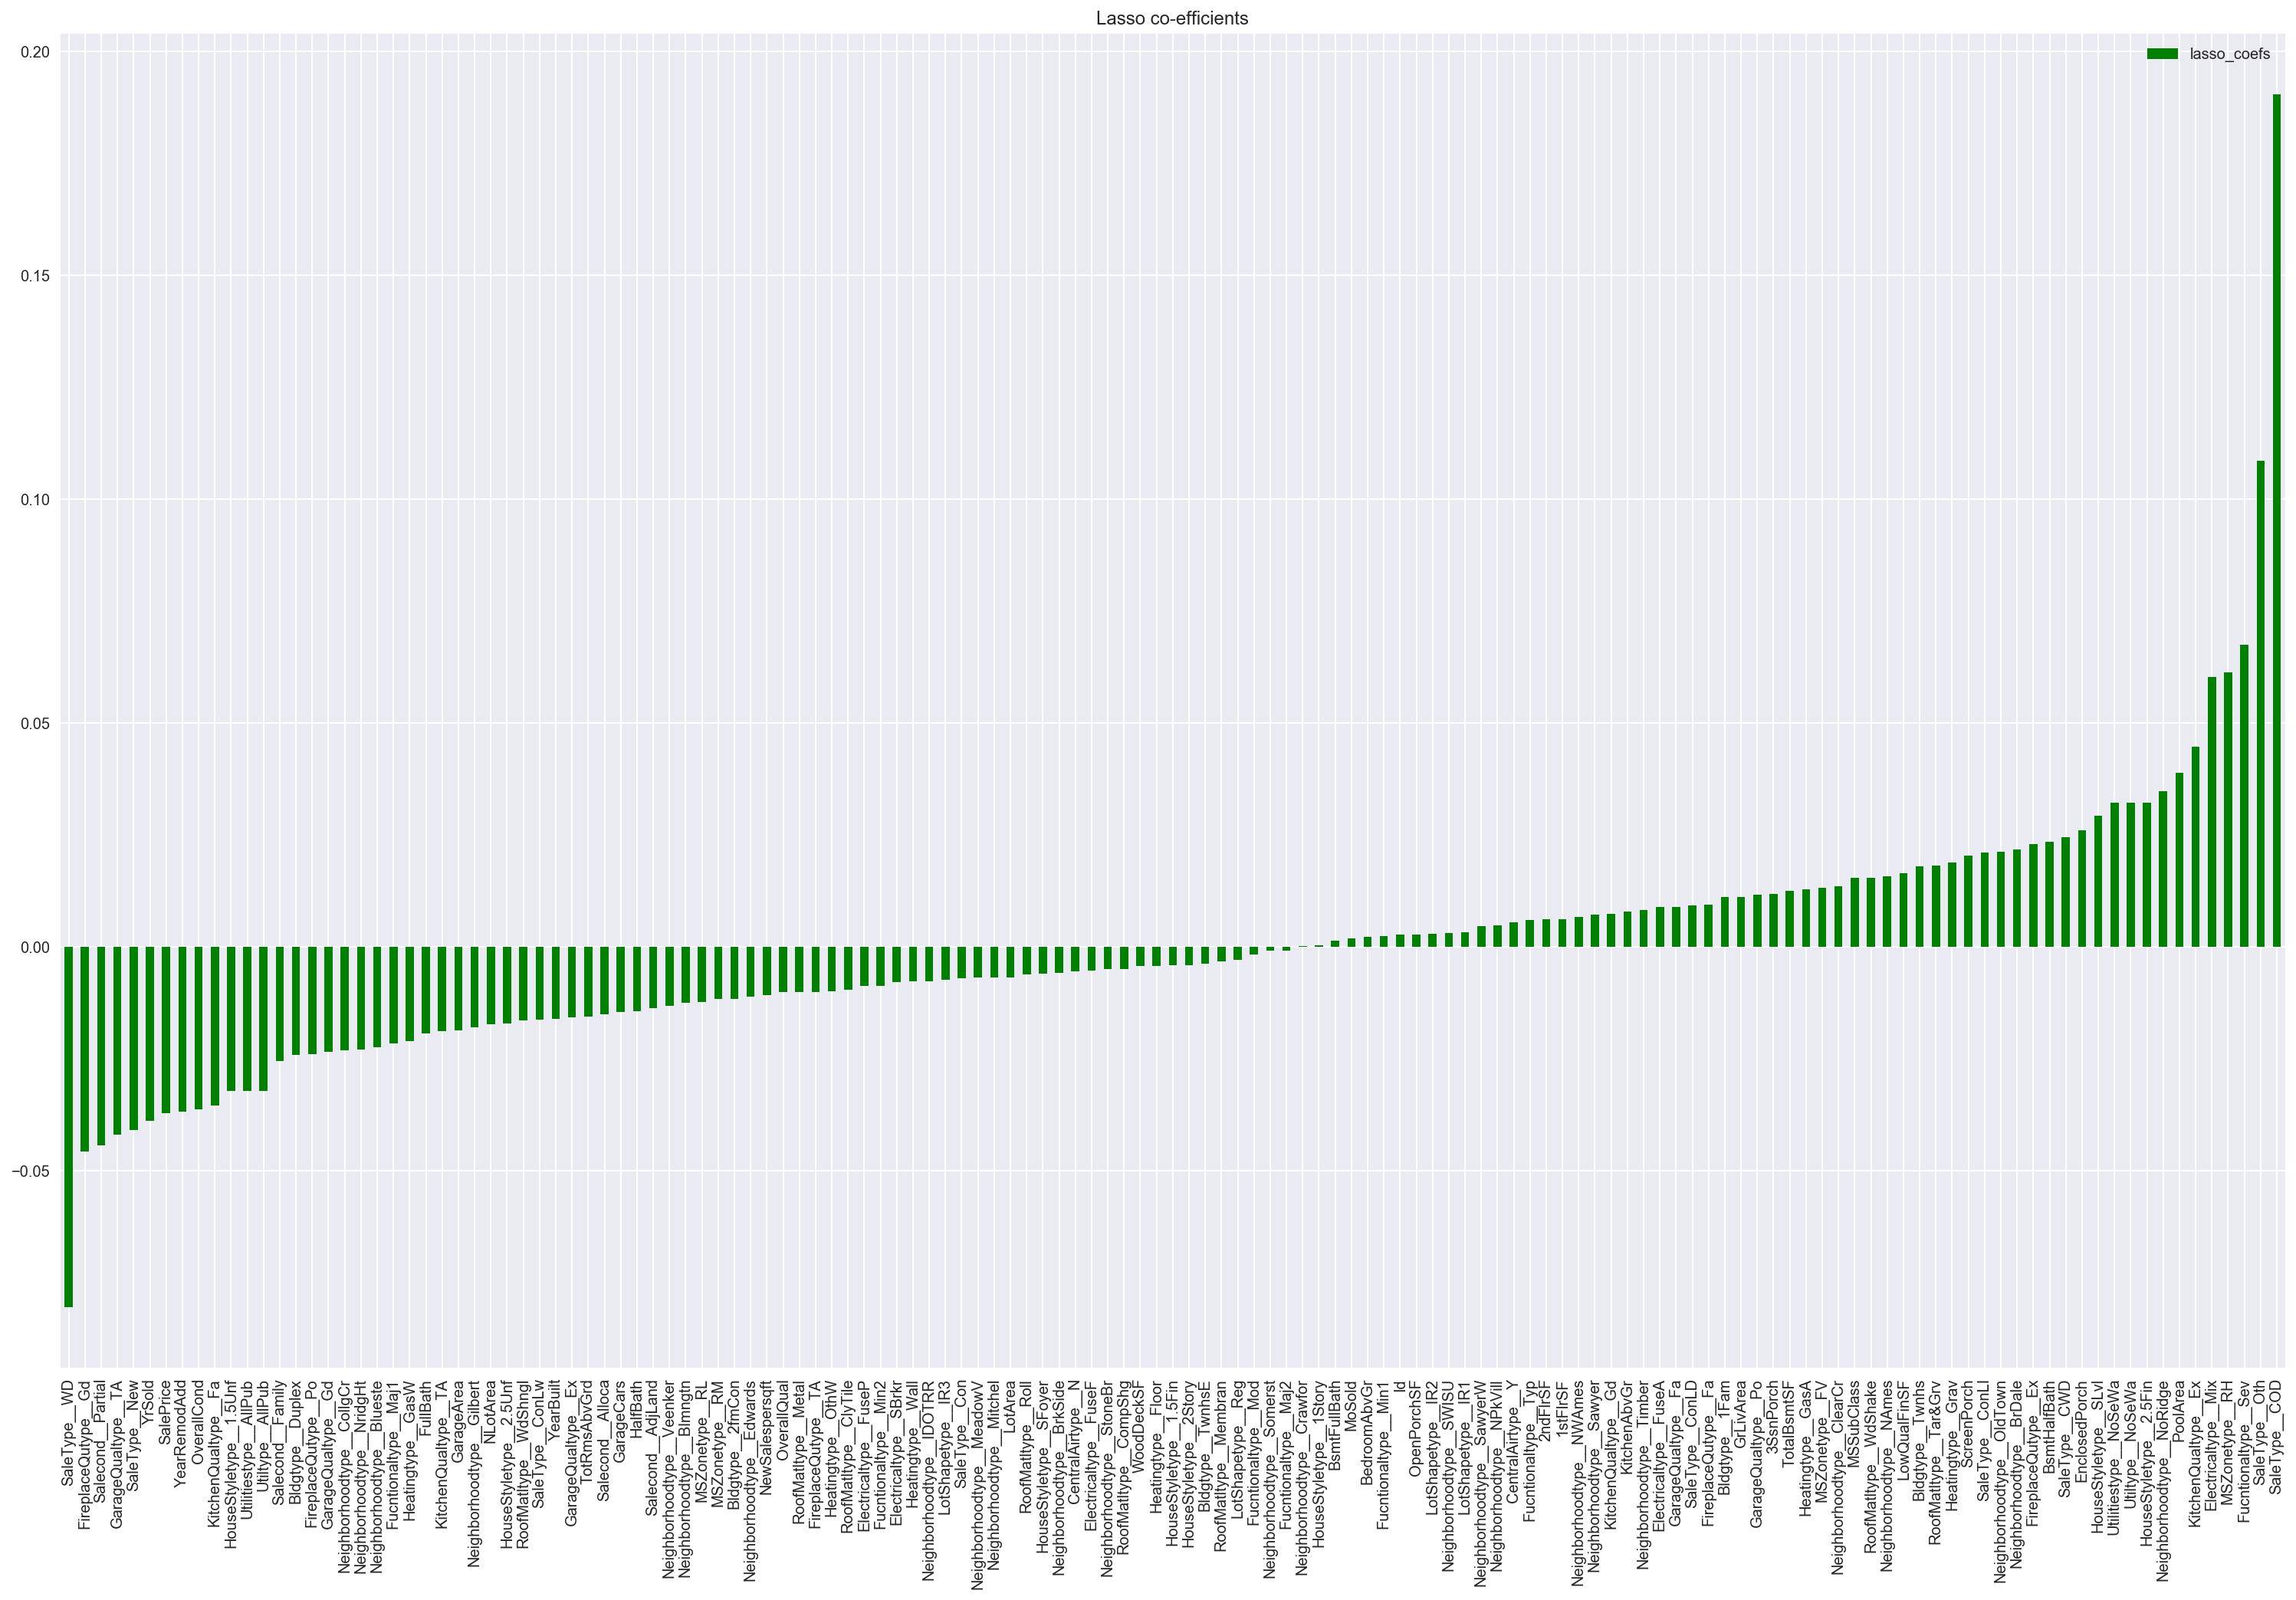

In [208]:
coeffs_t.sort_values('lasso_coefs').plot(kind='bar',figsize=(26,16),color='green',legend=True,title='Lasso co-efficients',fontsize=10)

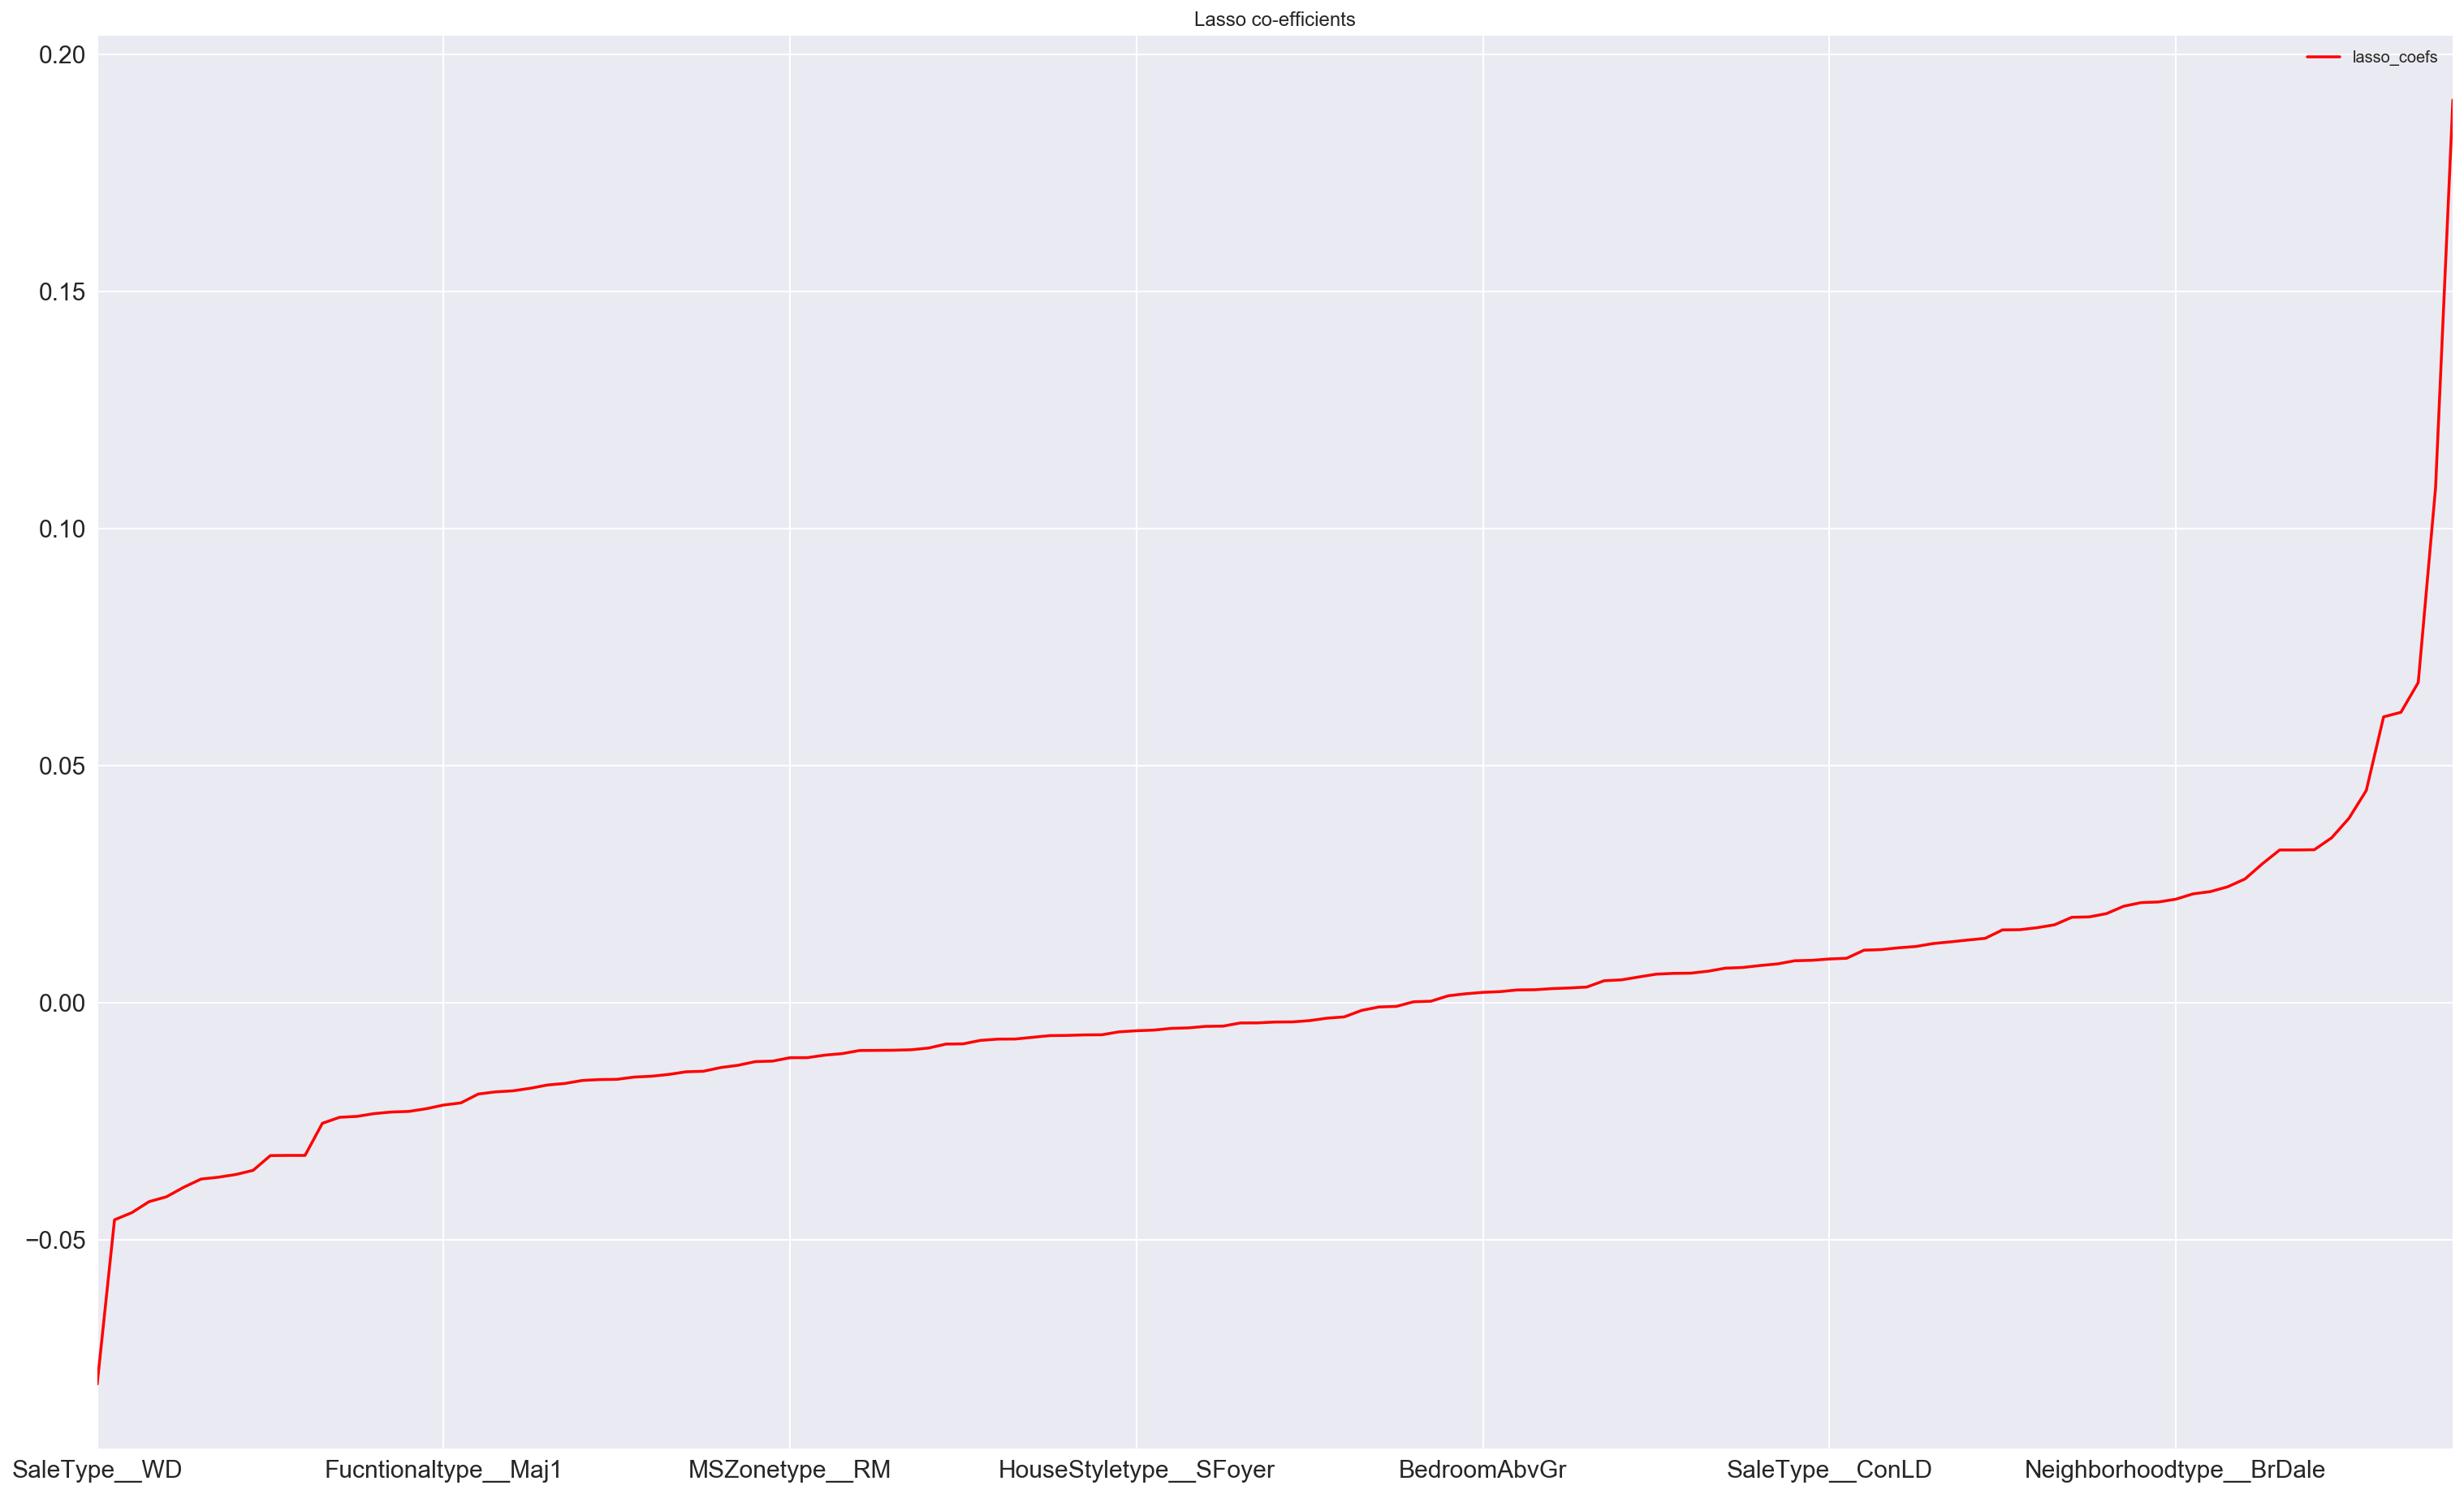

In [211]:
coeffs_t.sort_values('lasso_coefs').plot(kind='line',figsize=(26,16),color='red',legend=True,title='Lasso co-efficients',fontsize=15)